In [1]:
import pandas as pd

In [2]:
import seaborn as sns

## Birds flying

In [202]:
df = pd.read_csv('../../datasets/dbscan/gps/anon_gps_tracks_with_dive.csv', index_col=0)

In [203]:
df.head()

lat       lon        alt        unix  bird species   year  \
1  56.095451 -6.233089 -23.059999  1340627854     1   tCOGU  t2012   
2  56.095408 -6.233520  -2.983077  1340627954     1   tCOGU  t2012   
3  56.095437 -6.234275   3.470286  1340628054     1   tCOGU  t2012   
4  56.095635 -6.234815   1.902667  1340628154     1   tCOGU  t2012   
5  56.095821 -6.235293   2.824952  1340628254     1   tCOGU  t2012   

             date_time  max_depth.m  colony2  coverage_ratio  is_dive  \
1  2012-06-25 13:37:34    -2.172046        1             0.5    False   
2  2012-06-25 13:39:14    -1.152306        1             0.6    False   
3  2012-06-25 13:40:54    -2.172046        1             0.7    False   
4  2012-06-25 13:42:34    -2.172046        1             0.8    False   
5  2012-06-25 13:44:14    -2.172046        1             0.9    False   

   is_dive_1m  is_dive_2m  is_dive_4m  is_dive_5m  is_dive_0m  
1       False       False       False       False       False  
2       False       False       False       False       False  
3       False       False       False       False       False  
4       False       False       False       False       False  
5       False       False       False       False       False

In [204]:
df['species'].value_counts()

tRAZO    162414
tCOGU     63925
tEUSH     37379
Name: species, dtype: int64

In [205]:
df['bird'].value_counts()

104    6048
103    5889
100    5211
98     4532
44     4278
       ... 
93      985
82      916
86      903
81      897
5       506
Name: bird, Length: 108, dtype: int64

In [206]:
df['colony2'].value_counts()

1     89131
2     43002
9     40166
6     33890
5     19335
7     13785
3     10996
10     6506
4      3674
8      3233
Name: colony2, dtype: int64

In [207]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

<IPython.core.display.Javascript object>


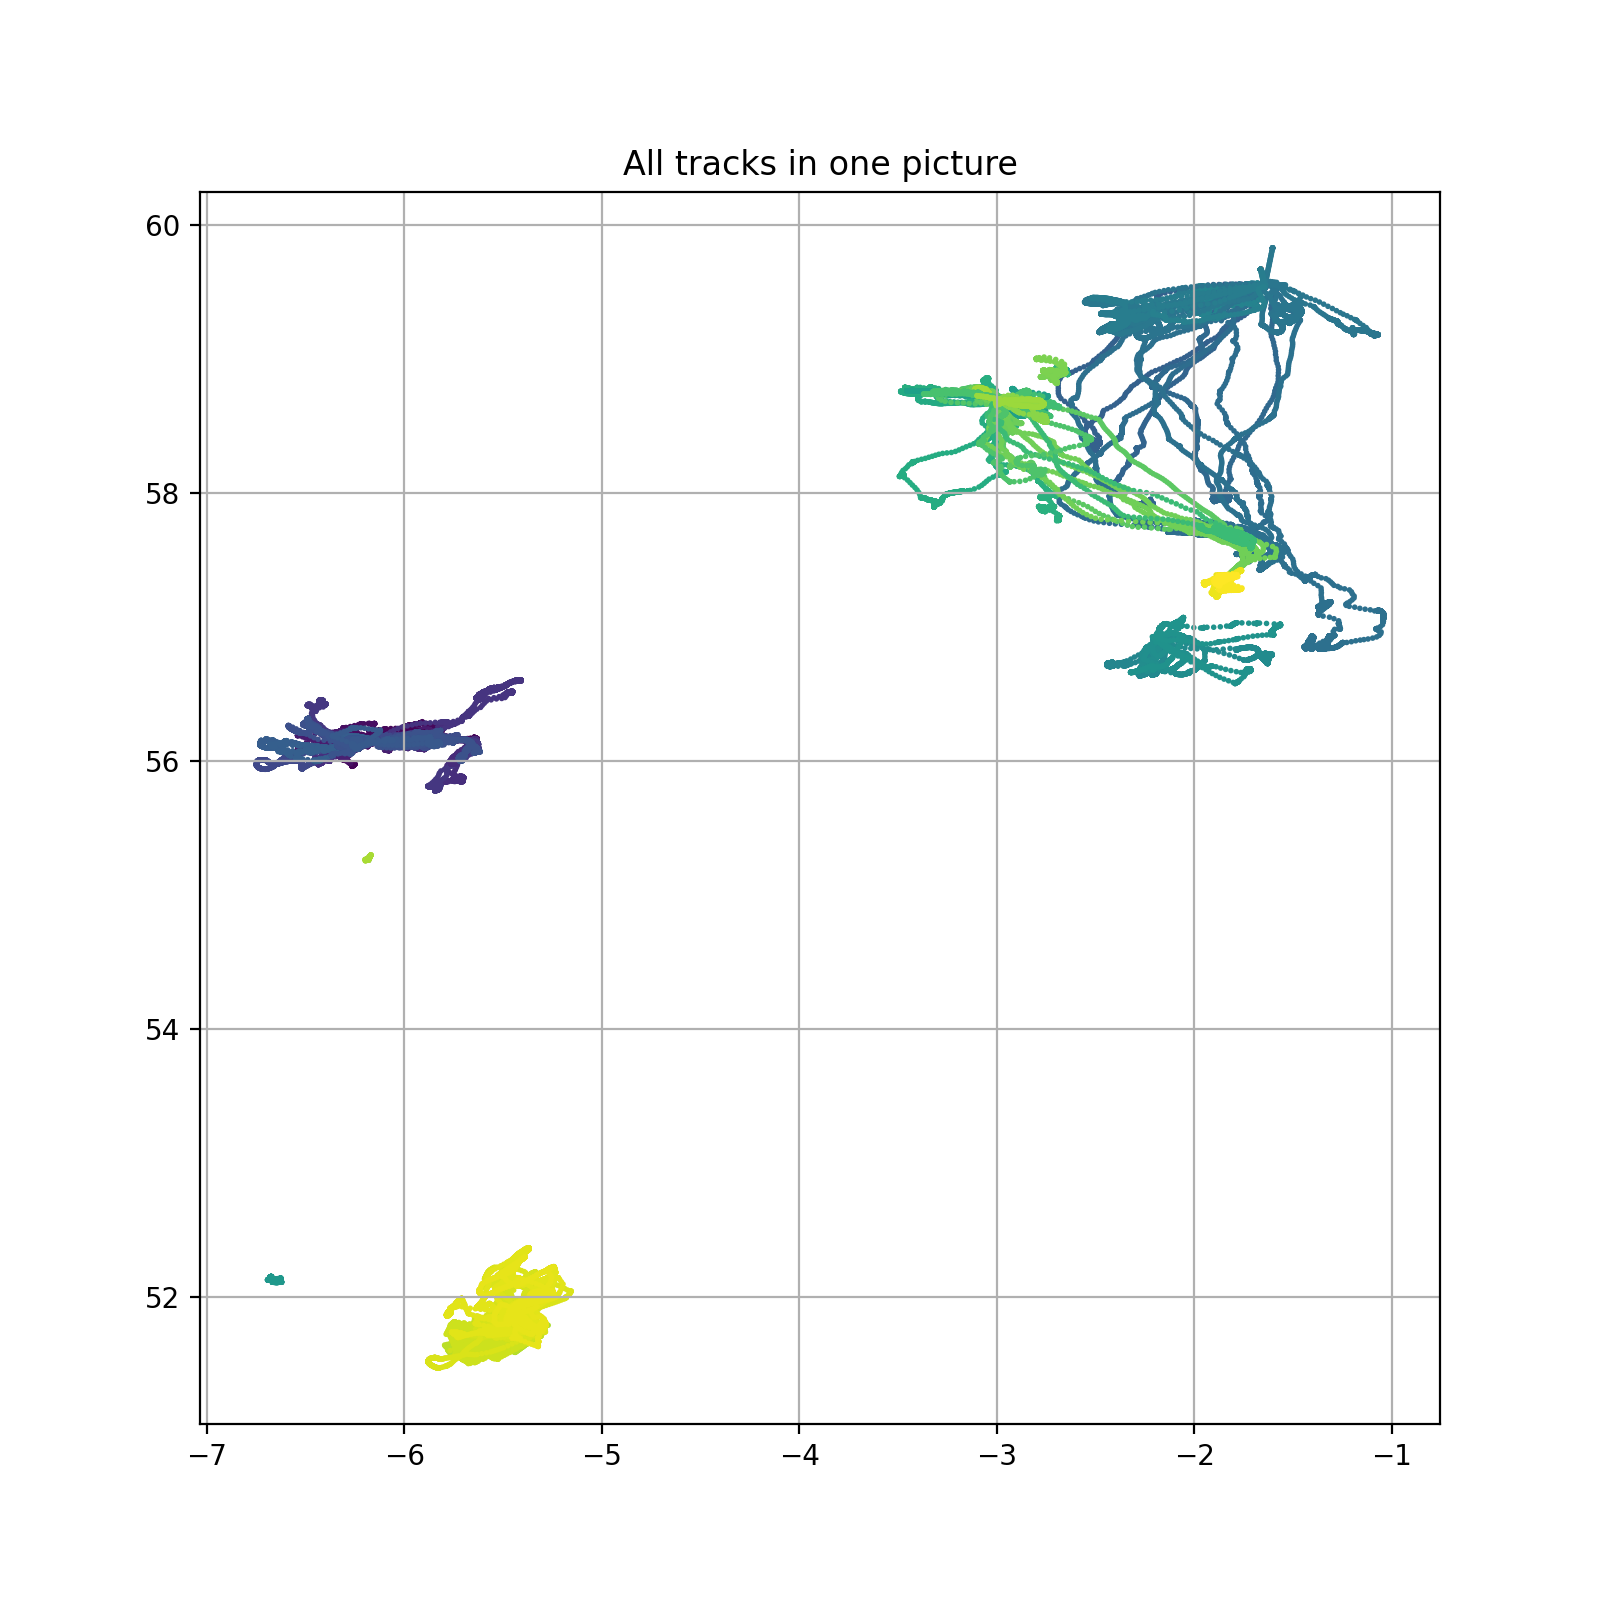

In [208]:
import matplotlib.pyplot as plt
# plot all tracks
plt.figure(figsize=(8,8))
plt.scatter(x=df.lon, y=df.lat, c=df.bird, s=1)
plt.title('All tracks in one picture')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


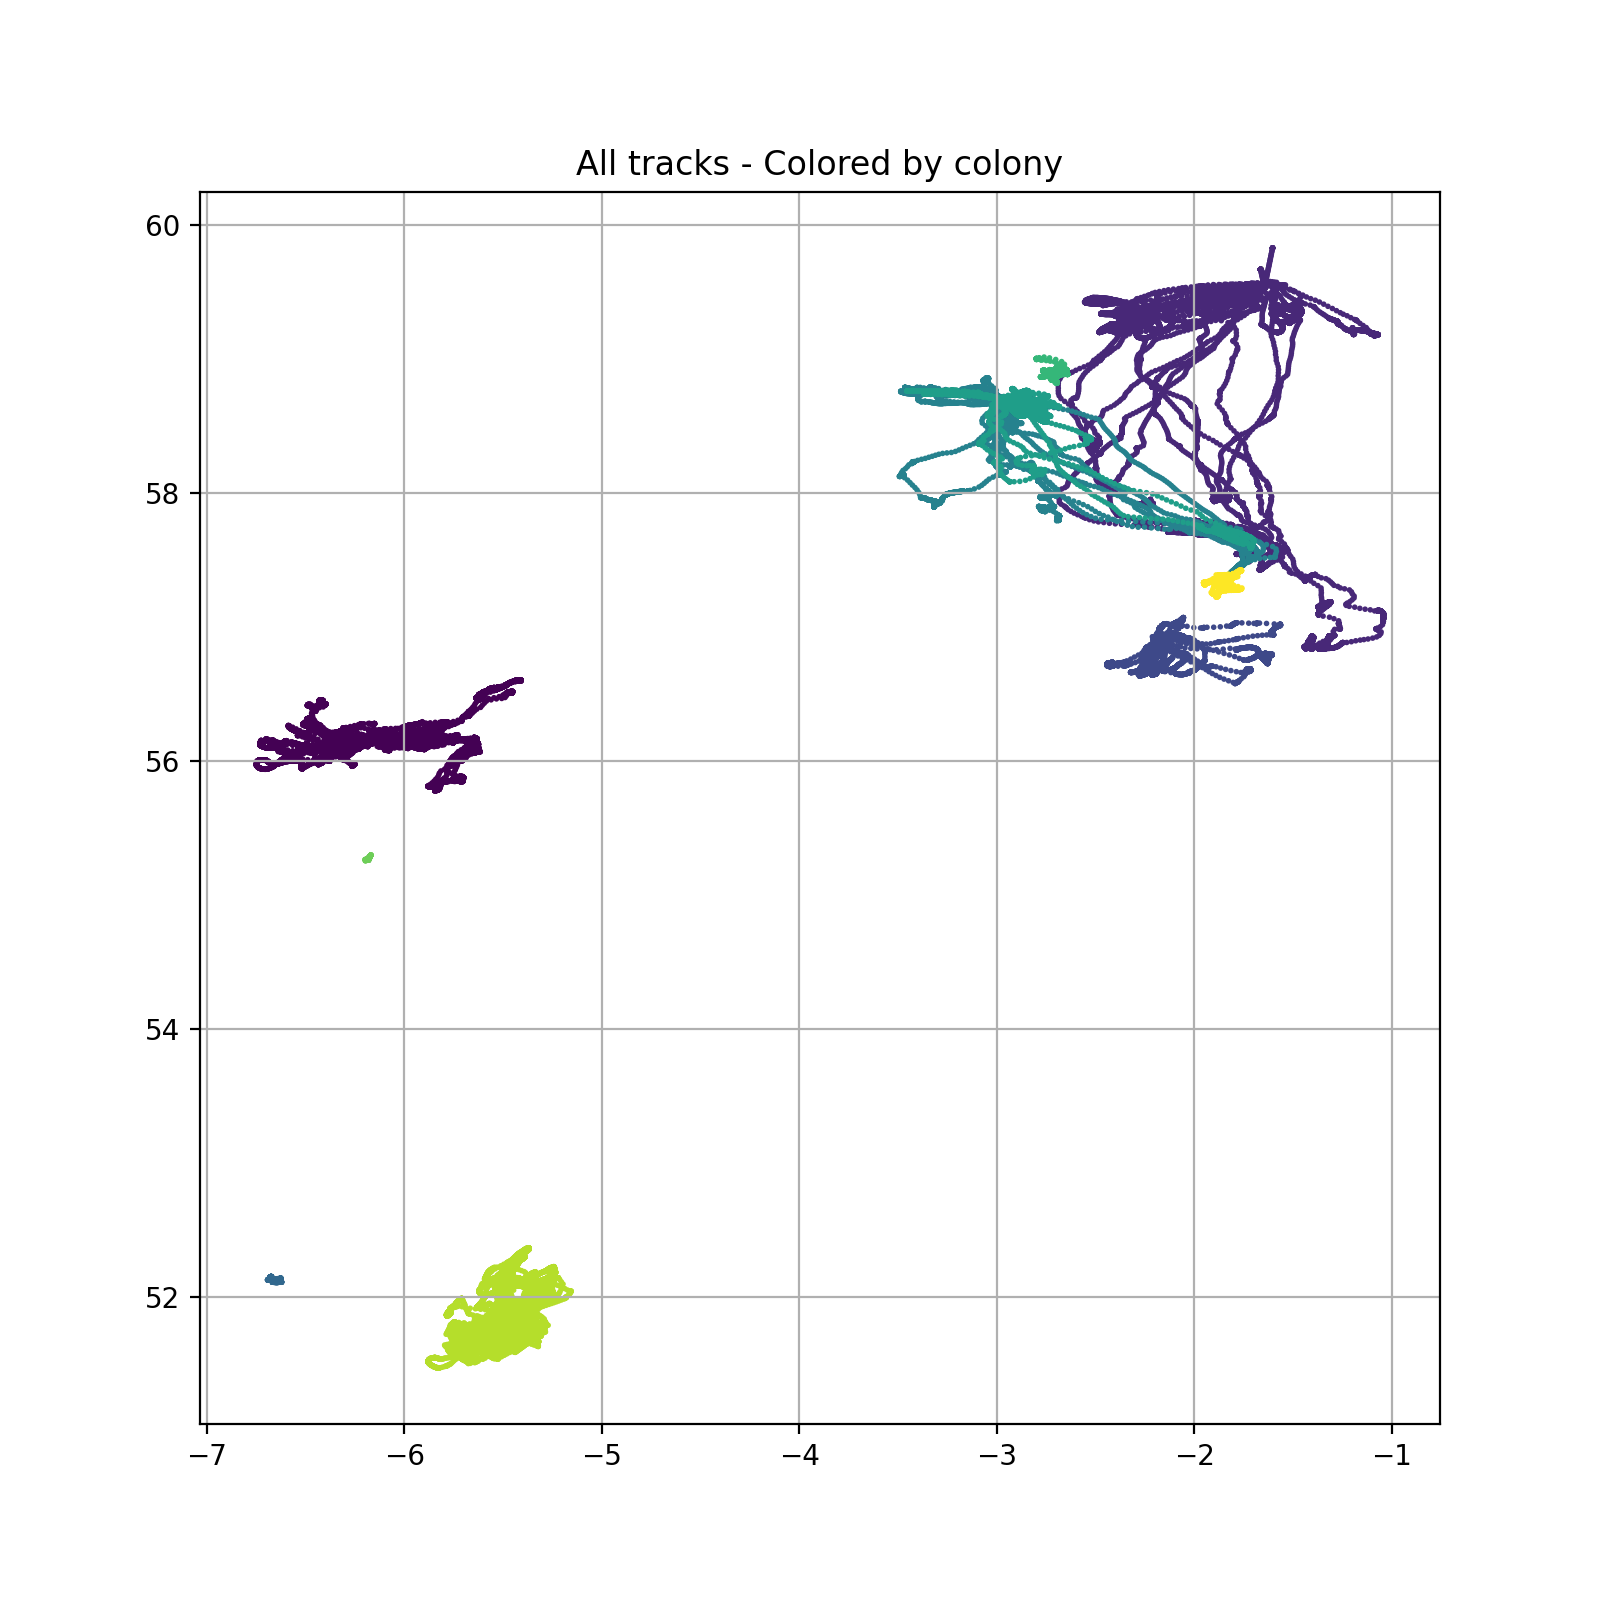

In [209]:
# plot all tracks - colored by colony
plt.figure(figsize=(8,8))
plt.scatter(x=df.lon, y=df.lat, c=df.colony2, s=1)
plt.title('All tracks - Colored by colony')
plt.grid()
plt.show()

In [213]:
import numpy as np

In [214]:
df['species'] = df['species'].astype('category').cat.codes
df['year'] = df['year'].astype('category').cat.codes
df['is_dive'] = df['is_dive'].astype('int')
df['is_dive_2m'] = df['is_dive_2m'].astype('int')
df['is_dive_4m'] = df['is_dive_4m'].astype('int')
df['is_dive_5m'] = df['is_dive_5m'].astype('int')
df['is_dive_0m'] = df['is_dive_0m'].astype('int')
df['is_dive_1m'] = df['is_dive_1m'].astype('int')
df['date_time'] = pd.to_datetime(df['date_time']).astype(int)

In [215]:
df = df.dropna()

In [216]:
df

lat       lon        alt        unix  bird  species  year  \
1       56.095451 -6.233089 -23.059999  1340627854     1        0     1   
2       56.095408 -6.233520  -2.983077  1340627954     1        0     1   
3       56.095437 -6.234275   3.470286  1340628054     1        0     1   
4       56.095635 -6.234815   1.902667  1340628154     1        0     1   
5       56.095821 -6.235293   2.824952  1340628254     1        0     1   
...           ...       ...        ...         ...   ...      ...   ...   
263704  57.380014 -1.876337  47.021193  1339499344   108        0     1   
263705  57.380068 -1.876404  33.248257  1339499444   108        0     1   
263706  57.379498 -1.875691  29.765143  1339499544   108        0     1   
263707  57.376813 -1.872797   3.596214  1339499644   108        0     1   
263708  57.377827 -1.877771  10.431468  1339499744   108        0     1   

                  date_time  max_depth.m  colony2  coverage_ratio  is_dive  \
1       1340631454000000000    -2.172046        1             0.5        0   
2       1340631554000000000    -1.152306        1             0.6        0   
3       1340631654000000000    -2.172046        1             0.7        0   
4       1340631754000000000    -2.172046        1             0.8        0   
5       1340631854000000000    -2.172046        1             0.9        0   
...                     ...          ...      ...             ...      ...   
263704  1339502944000000000    -2.172046       10             0.8        0   
263705  1339503044000000000    -2.172046       10             0.8        0   
263706  1339503144000000000    -2.172046       10             0.8        0   
263707  1339503244000000000    -2.172046       10             0.9        0   
263708  1339503344000000000    -1.152306       10             0.9        0   

        is_dive_1m  is_dive_2m  is_dive_4m  is_dive_5m  is_dive_0m  
1                0           0           0           0           0  
2                0           0           0           0           0  
3                0           0           0           0           0  
4                0           0           0           0           0  
5                0           0           0           0           0  
...            ...         ...         ...         ...         ...  
263704           0           0           0           0           0  
263705           0           0           0           0           0  
263706           0           0           0           0           0  
263707           0           0           0           0           0  
263708           0           0           0           0           0  

[262648 rows x 17 columns]

In [258]:
dfc = df[['lon', 'lat', 'max_depth.m', 'coverage_ratio', 'alt', 'is_dive',
          'is_dive_4m', 'is_dive_5m', 'is_dive_0m', 'is_dive_1m', 'unix', 'colony2', 'year']]#, 'species', 'colony2']]

In [259]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dfs = ss.fit_transform(dfc)

In [260]:
dfs.shape

(262648, 13)

In [254]:
17*2

34

In [261]:
len(dfc.columns)

13

In [262]:
dfc = dfc.dropna()
%matplotlib notebook

<IPython.core.display.Javascript object>


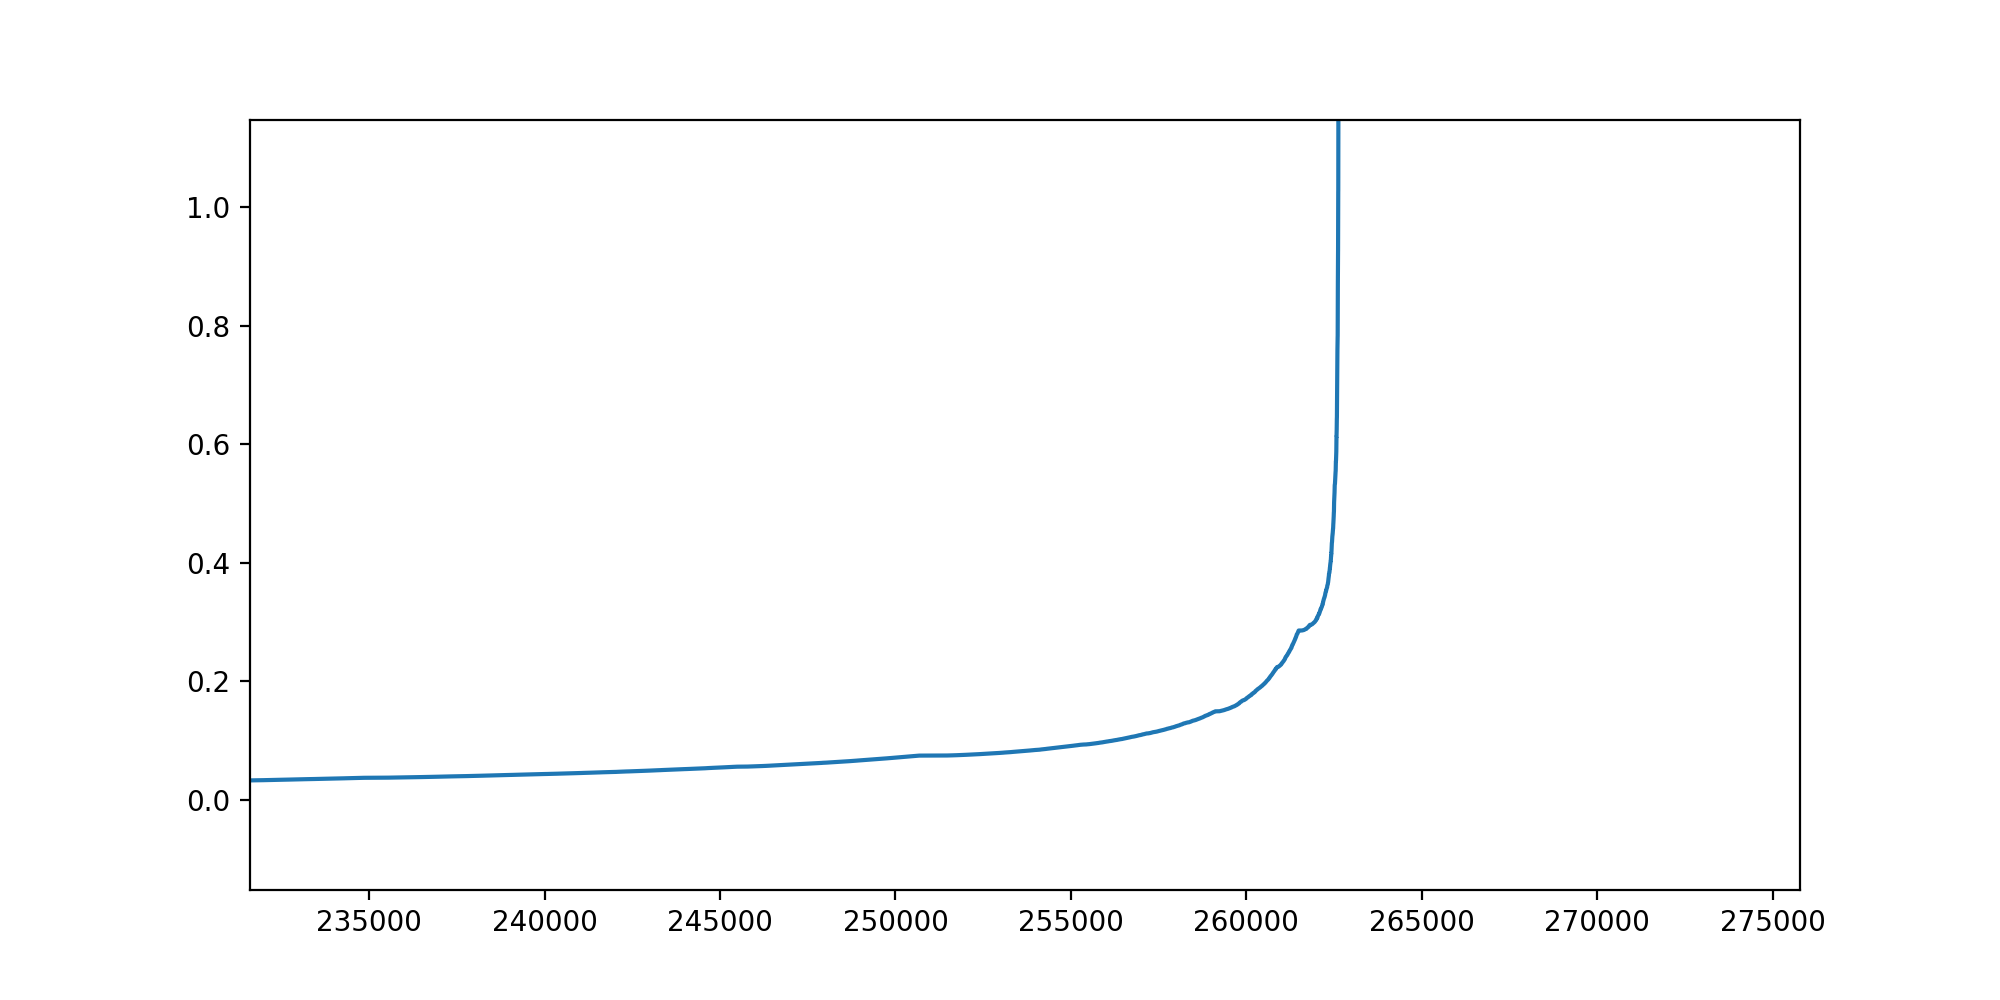

In [263]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(dfs)
distances, idx = nn.kneighbors(dfs)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show();

In [266]:
dfs

array([[-1.07693454, -0.19473957, -0.30747837, ..., -0.66495755,
        -0.9845386 , -0.70433724],
       [-1.0771668 , -0.19475704, -0.23279768, ..., -0.66495401,
        -0.9845386 , -0.70433724],
       [-1.07757391, -0.19474519, -0.30747837, ..., -0.66495047,
        -0.9845386 , -0.70433724],
       ...,
       [ 1.27247756,  0.32355107, -0.30747837, ..., -0.70493306,
         1.90714742, -0.70433724],
       [ 1.27403766,  0.32246736, -0.30747837, ..., -0.70492952,
         1.90714742, -0.70433724],
       [ 1.27135612,  0.32287645, -0.23279768, ..., -0.70492597,
         1.90714742, -0.70433724]])

In [267]:
dbs = DBSCAN(eps=0.21, min_samples=26).fit(dfs)
len(np.unique(dbs.labels_))

600

In [271]:
dfs

array([[-1.07693454, -0.19473957, -0.30747837, ..., -0.66495755,
        -0.9845386 , -0.70433724],
       [-1.0771668 , -0.19475704, -0.23279768, ..., -0.66495401,
        -0.9845386 , -0.70433724],
       [-1.07757391, -0.19474519, -0.30747837, ..., -0.66495047,
        -0.9845386 , -0.70433724],
       ...,
       [ 1.27247756,  0.32355107, -0.30747837, ..., -0.70493306,
         1.90714742, -0.70433724],
       [ 1.27403766,  0.32246736, -0.30747837, ..., -0.70492952,
         1.90714742, -0.70433724],
       [ 1.27135612,  0.32287645, -0.23279768, ..., -0.70492597,
         1.90714742, -0.70433724]])

In [273]:
dfc['cluster'] = dbs.labels_

In [275]:
dfc

lon        lat  max_depth.m  coverage_ratio        alt  is_dive  \
1      -6.233089  56.095451    -2.172046             0.5 -23.059999        0   
2      -6.233520  56.095408    -1.152306             0.6  -2.983077        0   
3      -6.234275  56.095437    -2.172046             0.7   3.470286        0   
4      -6.234815  56.095635    -2.172046             0.8   1.902667        0   
5      -6.235293  56.095821    -2.172046             0.9   2.824952        0   
...          ...        ...          ...             ...        ...      ...   
263704 -1.876337  57.380014    -2.172046             0.8  47.021193        0   
263705 -1.876404  57.380068    -2.172046             0.8  33.248257        0   
263706 -1.875691  57.379498    -2.172046             0.8  29.765143        0   
263707 -1.872797  57.376813    -2.172046             0.9   3.596214        0   
263708 -1.877771  57.377827    -1.152306             0.9  10.431468        0   

        is_dive_4m  is_dive_5m  is_dive_0m  is_dive_1m        unix  colony2  \
1                0           0           0           0  1340627854        1   
2                0           0           0           0  1340627954        1   
3                0           0           0           0  1340628054        1   
4                0           0           0           0  1340628154        1   
5                0           0           0           0  1340628254        1   
...            ...         ...         ...         ...         ...      ...   
263704           0           0           0           0  1339499344       10   
263705           0           0           0           0  1339499444       10   
263706           0           0           0           0  1339499544       10   
263707           0           0           0           0  1339499644       10   
263708           0           0           0           0  1339499744       10   

        year  cluster  
1          1        0  
2          1        1  
3          1        2  
4          1        3  
5          1        4  
...      ...      ...  
263704     1      593  
263705     1      593  
263706     1      593  
263707     1      594  
263708     1      594  

[262648 rows x 14 columns]

<IPython.core.display.Javascript object>


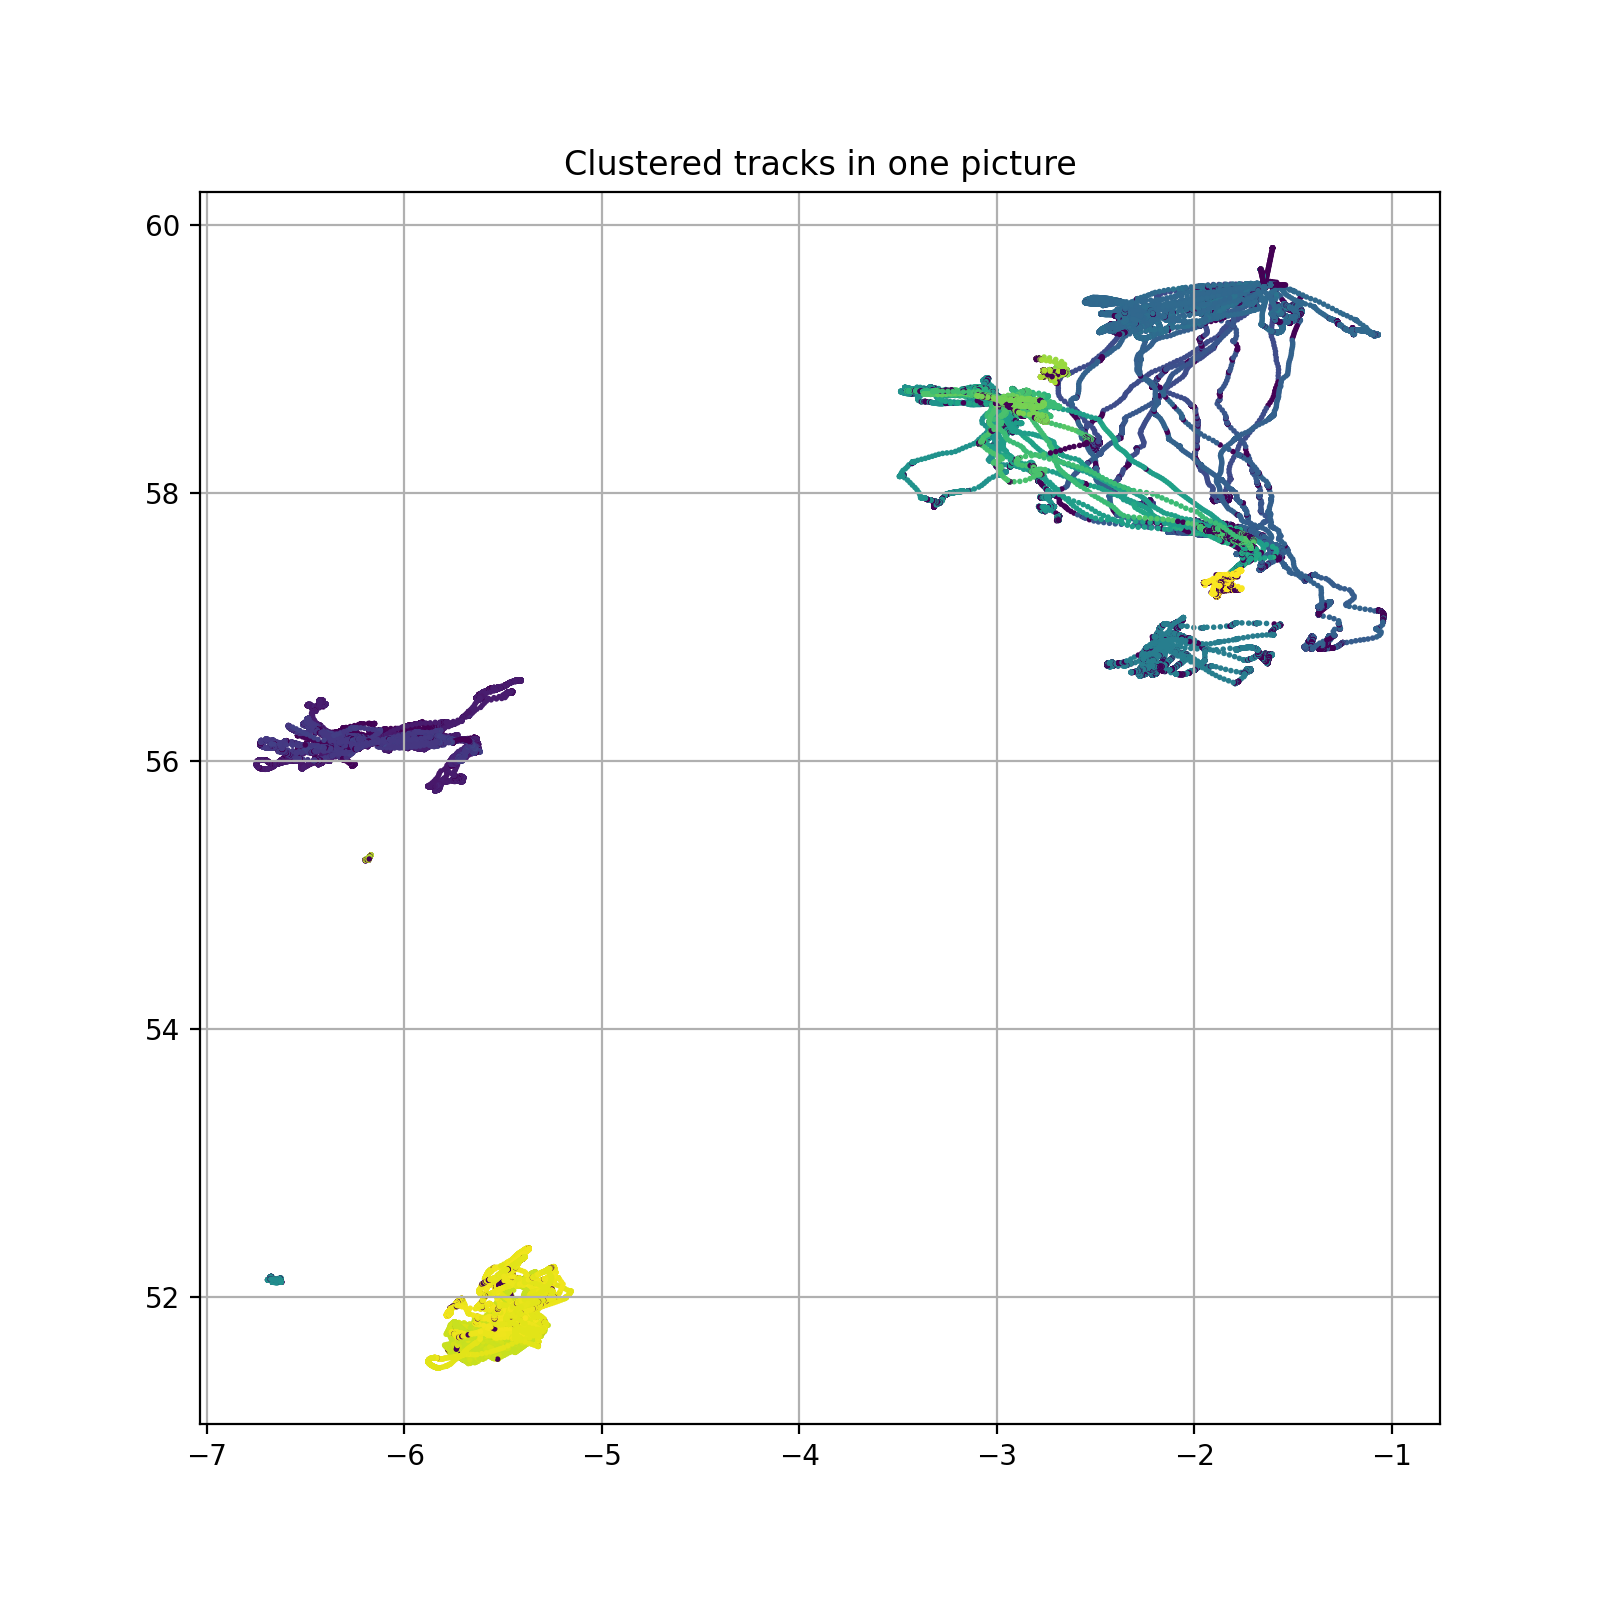

In [276]:
plt.figure(figsize=(8,8))
plt.scatter(x=dfc.lon, y=dfc.lat, c=dfc.cluster, s=1)
plt.title('Clustered tracks in one picture')
plt.grid()
plt.show()

## IMDB Movies
- kaggle: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [220]:
df = pd.read_csv('../../datasets/dbscan/imdb_top_1000.csv')

In [221]:
df.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

In [222]:
df['Genre'] = df['Genre'].str.split().str.get(0).str.replace(",", "")

In [223]:
gs = ['Drama', 'Comedy', 'Fantasy']

In [224]:
df = df[df['Genre'].isin(gs)]

<IPython.core.display.Javascript object>


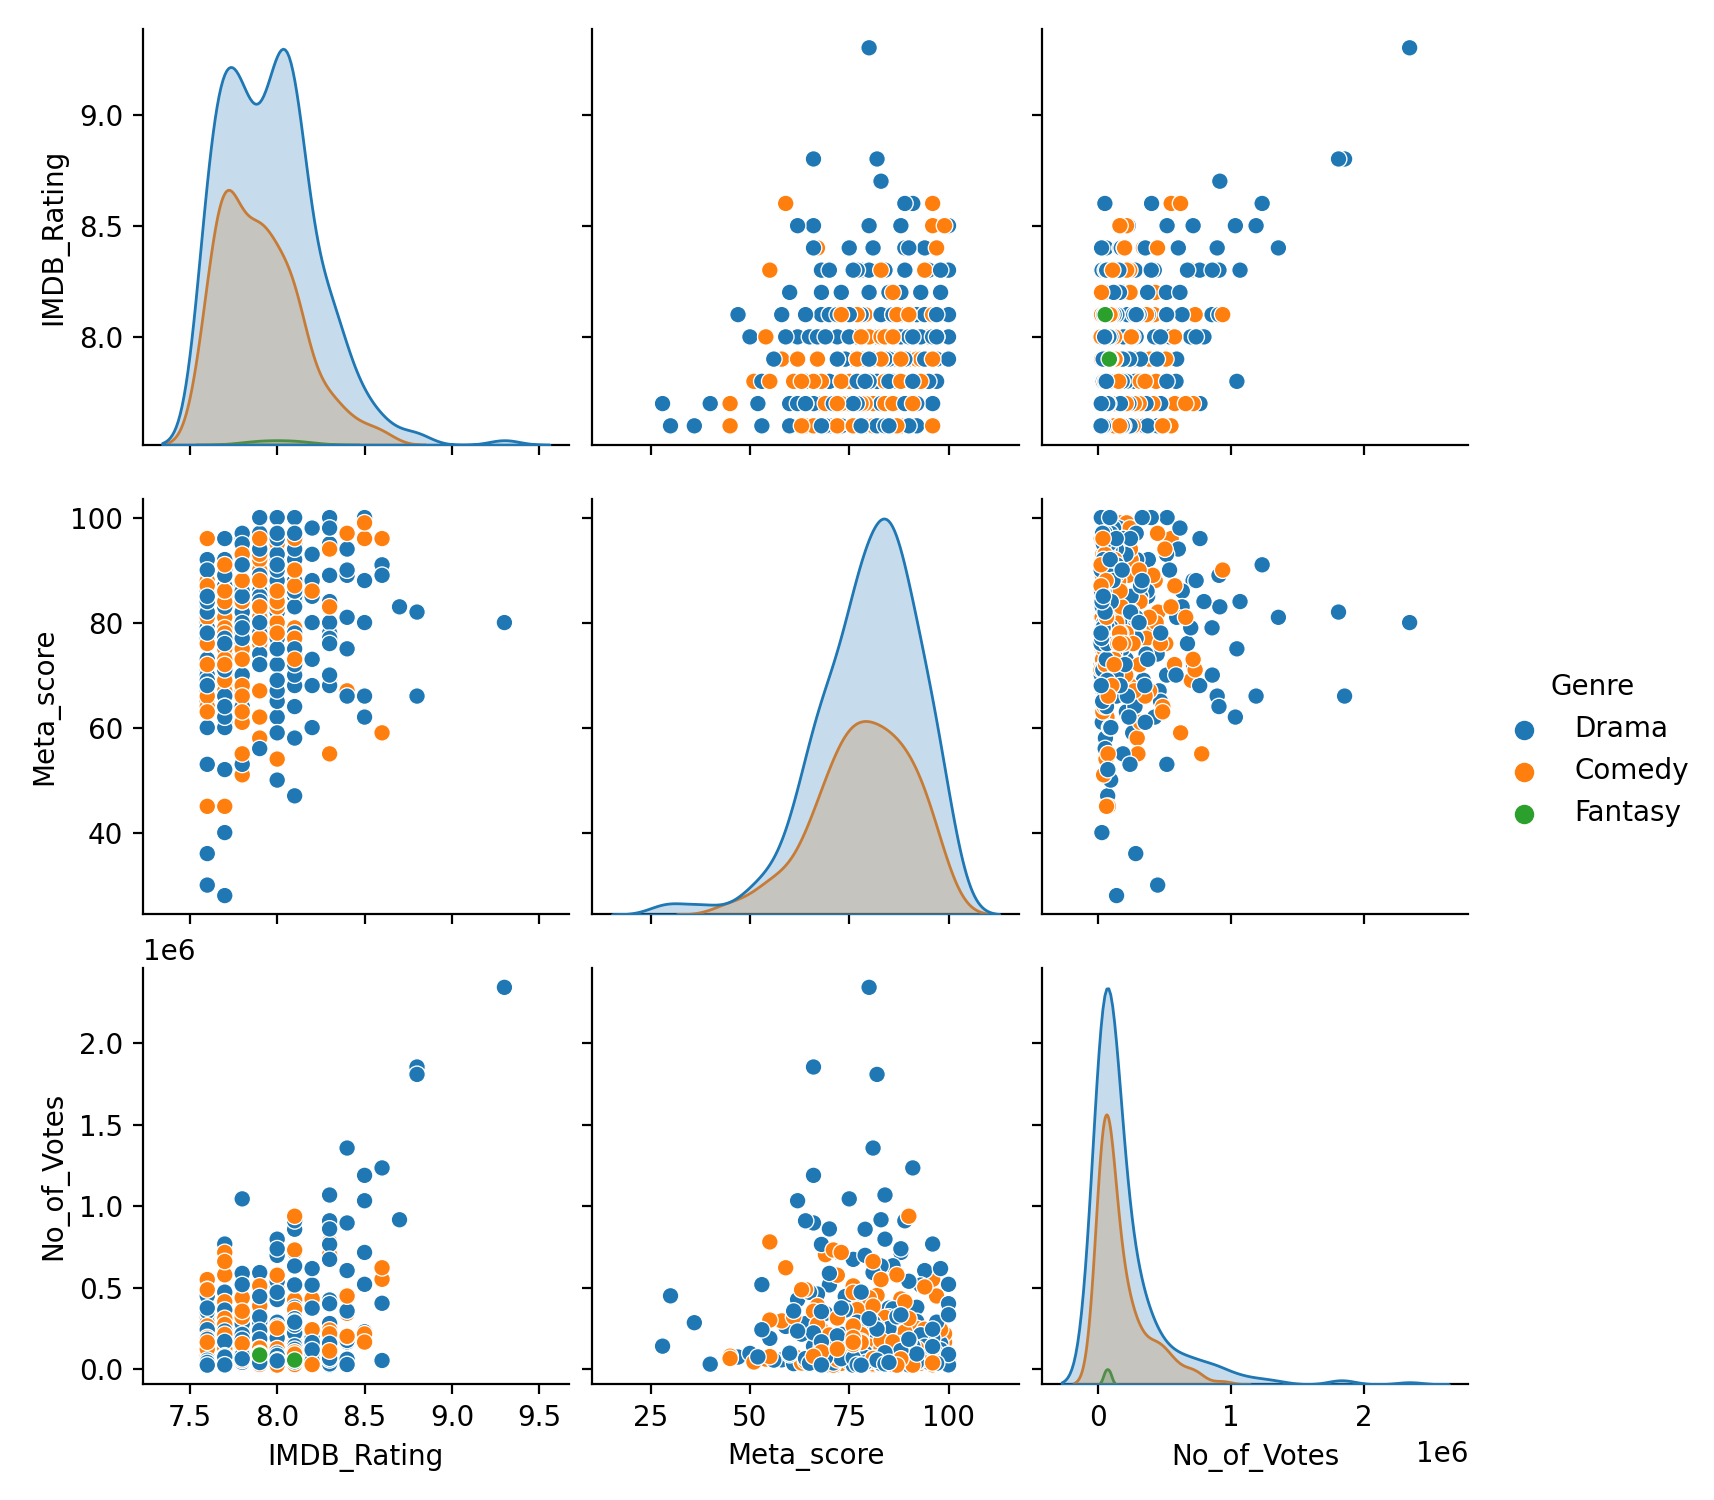

In [225]:
sns.pairplot(df, hue='Genre')

In [195]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

<IPython.core.display.Javascript object>


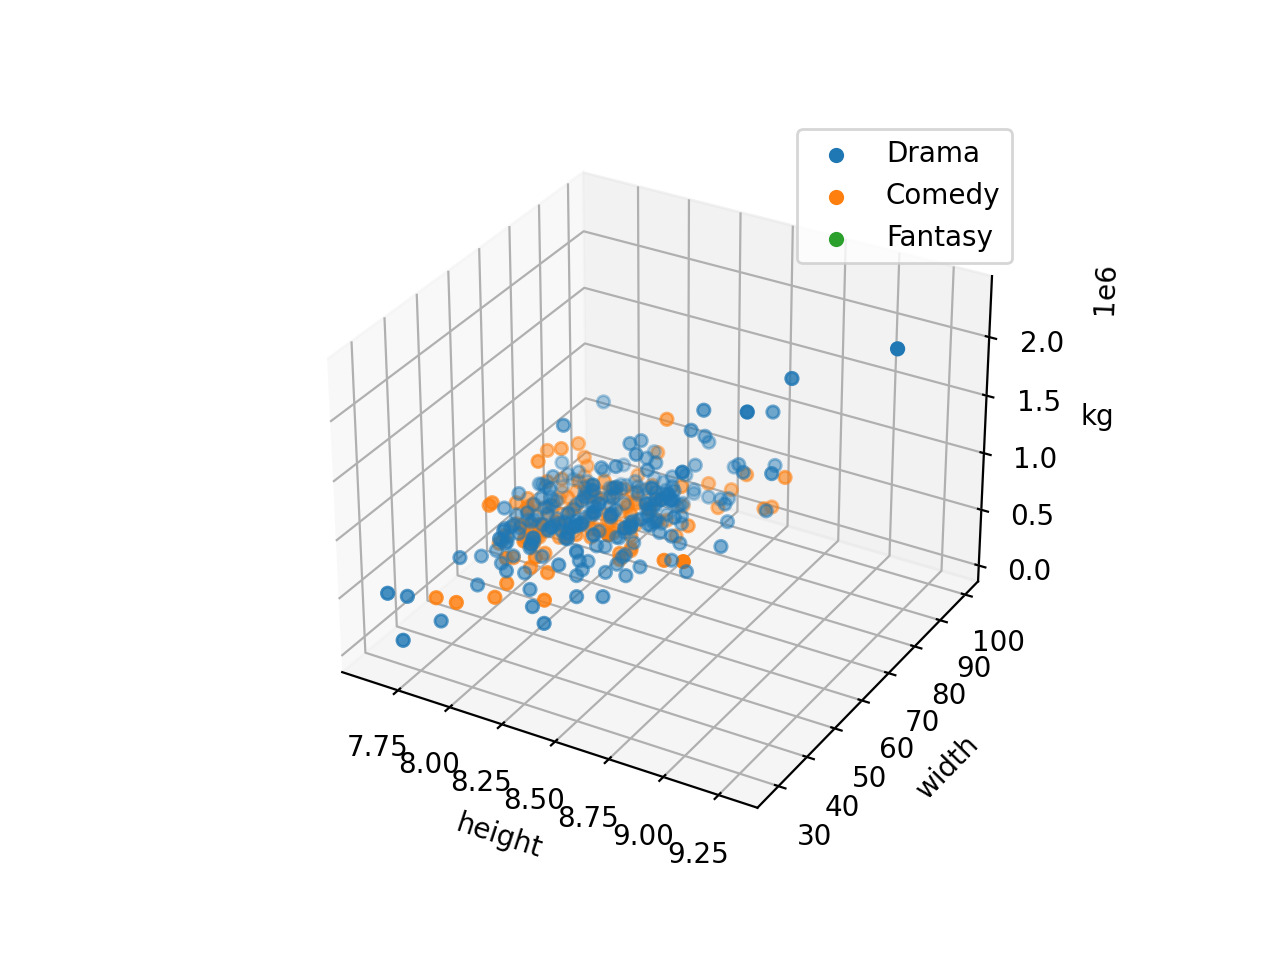

In [226]:
fig = plt.figure()#figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

x = df['IMDB_Rating']
y = df['Meta_score']
z = df['No_of_Votes']

for g in df['Genre'].unique():
    ax.scatter(x[df['Genre']==g],y[df['Genre']==g],z[df['Genre']==g],label=g)

ax.set_xlabel("height")
ax.set_ylabel("width")
ax.set_zlabel("kg")
   
ax.legend(); # loc="upper left", bbox_to_anchor=(-0.7,1.2)

In [227]:
df = df[['IMDB_Rating', 'Meta_score', 'No_of_Votes']]

In [228]:
df = df.fillna(0)

<IPython.core.display.Javascript object>


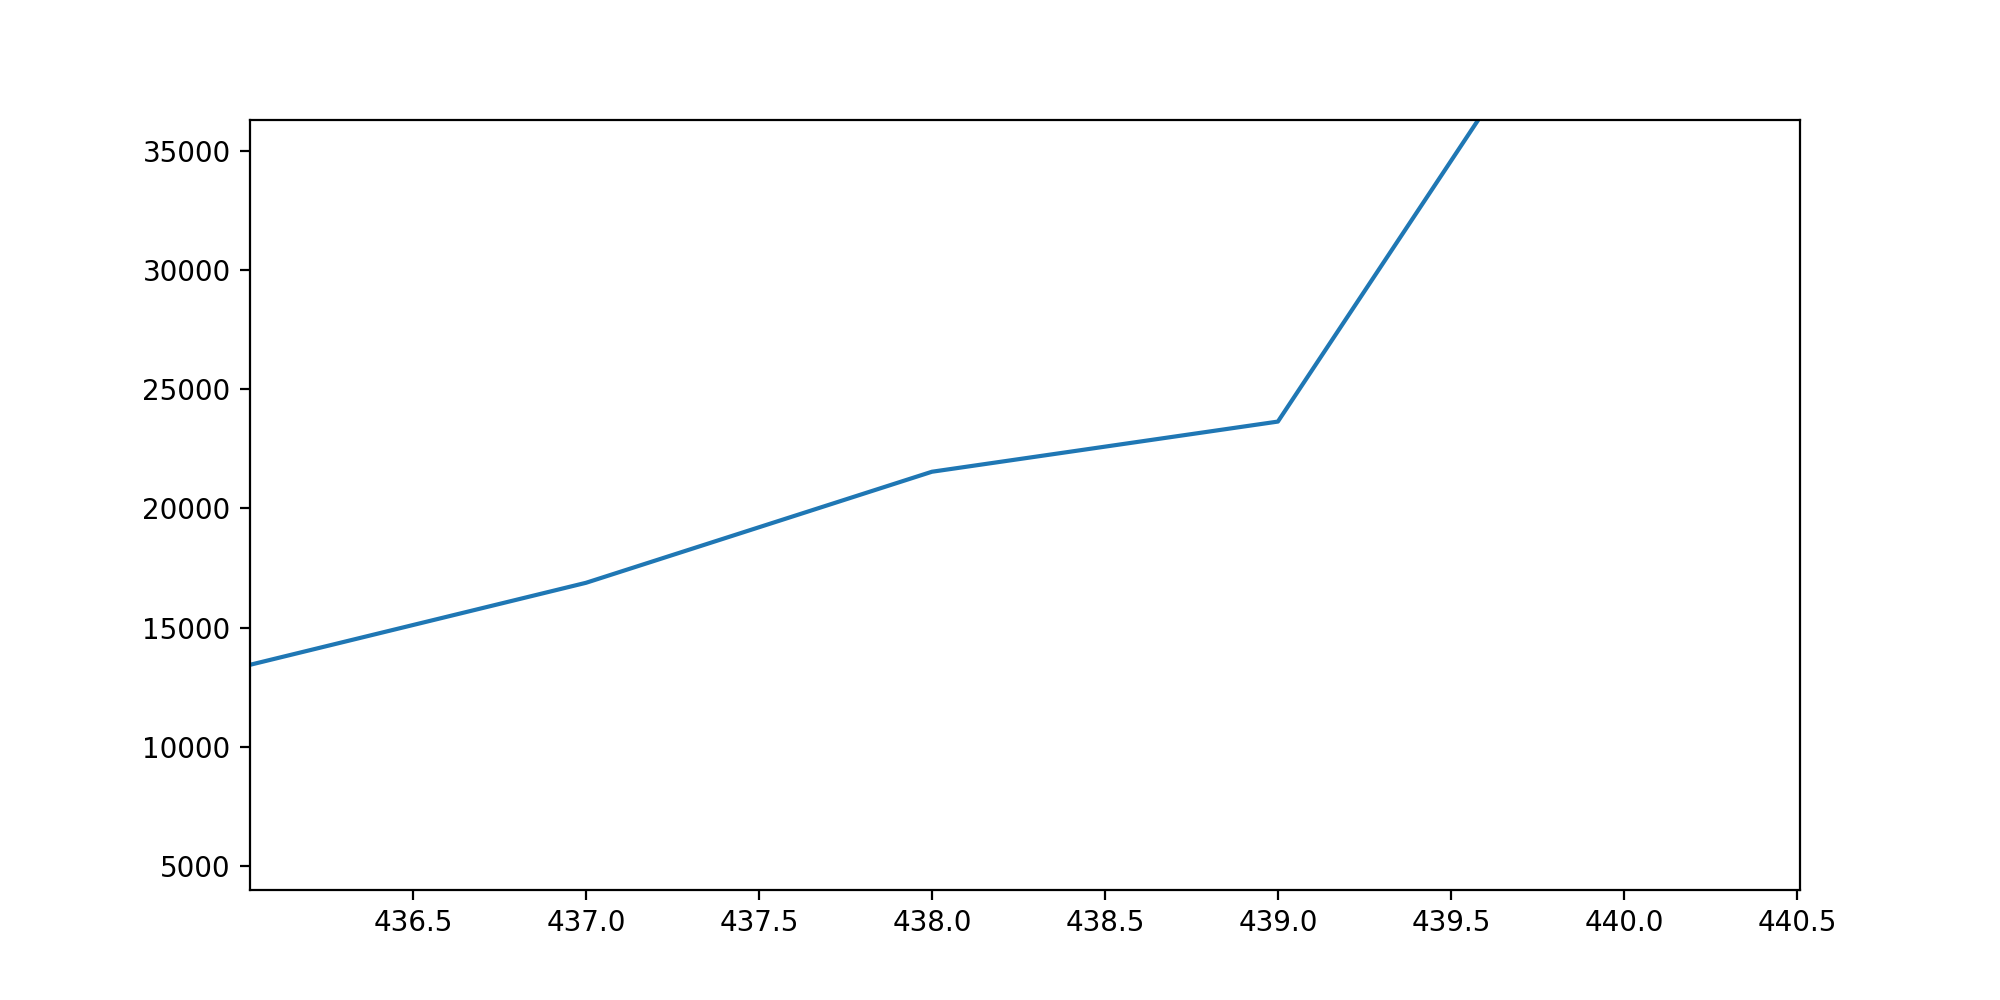

In [229]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(df)
distances, idx = nn.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show();

In [237]:
dbs = DBSCAN(eps=23640, min_samples=6).fit(df)
np.unique(dbs.labels_)

array([-1,  0,  1])

In [238]:
df['cluster'] = dbs.labels_

In [240]:
df

IMDB_Rating  Meta_score  No_of_Votes  cluster
0            9.3        80.0      2343110       -1
9            8.8        66.0      1854740       -1
11           8.8        82.0      1809221       -1
17           8.7        83.0       918088       -1
19           8.6        96.0       552778        0
..           ...         ...          ...      ...
994          7.6        96.0        40351        0
995          7.6        76.0       166544        0
996          7.6        84.0        34075        0
997          7.6        85.0        43374        0
998          7.6        78.0        26471        0

[446 rows x 4 columns]

<IPython.core.display.Javascript object>


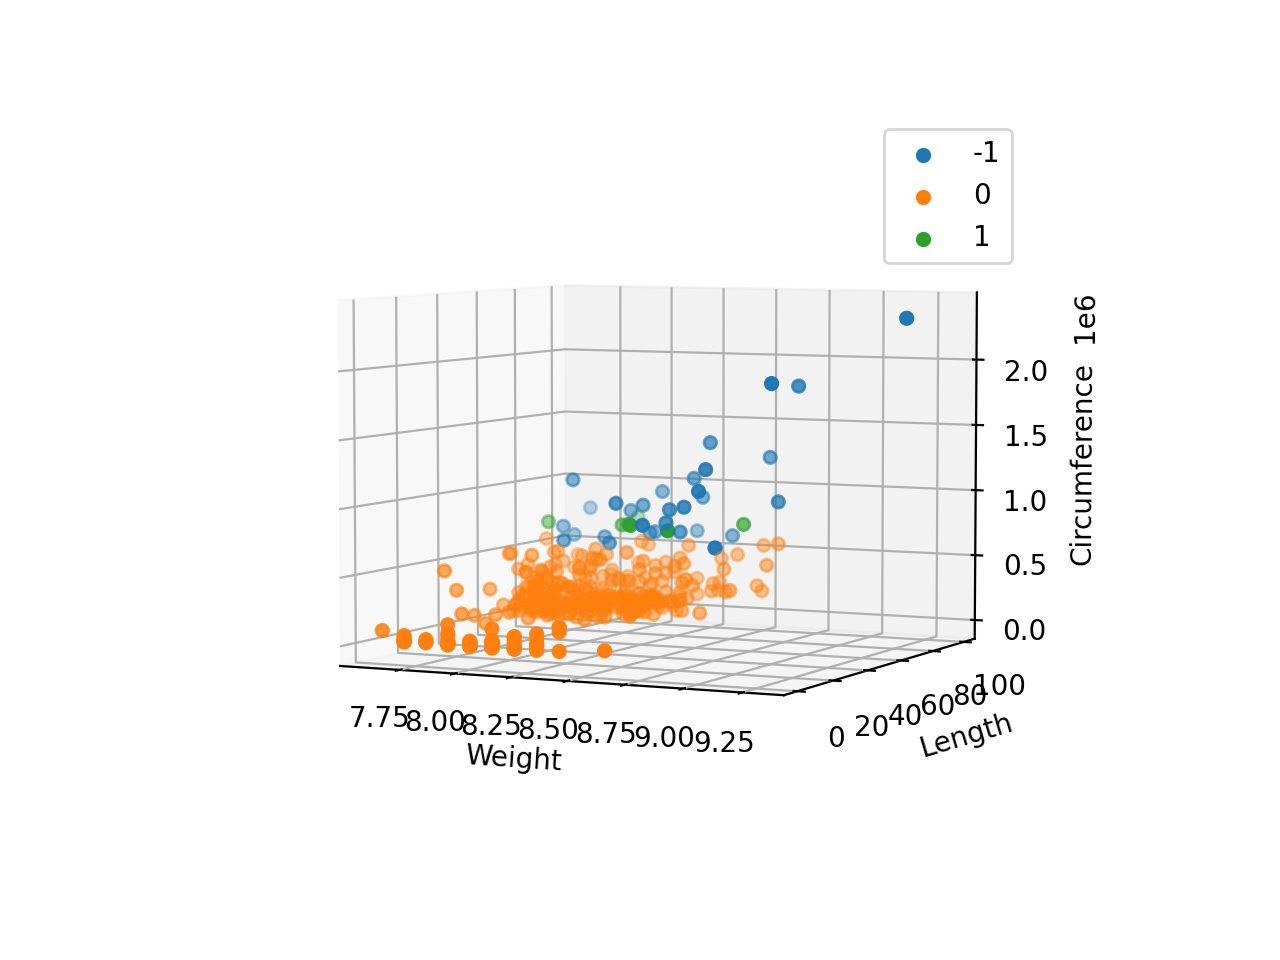

In [241]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['IMDB_Rating']
y = df['Meta_score']
z = df['No_of_Votes']

for g in df.cluster.unique():
    ax.scatter(x[df.cluster==g],y[df.cluster==g],z[df.cluster==g],label=g)

ax.set_xlabel("Weight")
ax.set_ylabel("Length")
ax.set_zlabel("Circumference")
   
ax.legend();

## Oreo flavors ratings
- kaggle: https://www.kaggle.com/datasets/rtatman/oreo-flavors-tastetest-ratings

In [72]:
#o = pd.read_csv('../../datasets/dbscan/oreo_rankings.csv')

In [73]:
#o.head()

In [74]:
#sns.pairplot(o, hue='oreo_flavor');

## Fruit hardness, size, and weight for wild fruits in Uganda and Madagascaruits 

- kaggle: https://www.kaggle.com/datasets/erenakbulut/fruit-hardnesssizeweight-ugandamadagascar
- source: https://zenodo.org/record/5021839
- paper: Variation in ripe fruit hardness: a mechanical constraint?

In [10]:
dfc = pd.read_csv('../../datasets/dbscan/Complete_Dataset.csv')
#dff = pd.read_csv('../datasets/dbscan/Netflix_Dataset_Movie.csv')

In [11]:
dfc.shape

(514, 12)

In [12]:
dfc.shape

(514, 12)

In [13]:
dfc.head()

family genus species_common_name name_for_analysis  Fruit ID  1.5 or 0.5  \
0     UK   NaN           Blueberry          UK sp 1.       7.0         0.5   
1     UK   NaN           Blueberry          UK sp 1.       7.0         0.5   
2     UK   NaN           Blueberry          UK sp 1.       7.0         0.5   
3     UK   NaN           Blueberry          UK sp 1.       7.0         0.5   
4     UK   NaN           Blueberry          UK sp 1.       7.0         0.5   

   height mm  depth mm  width mm    volume     kgmm2  wet.weight.grams  
0        7.0       7.0       8.0  205.2512  0.070211              0.33  
1        6.0       7.0       7.0  153.9384  0.052658              0.26  
2        6.0       8.0       8.0  201.0624  0.052658              0.27  
3        7.0       7.0       7.0  179.5948  0.035105              0.24  
4        7.0       7.0       7.0  179.5948  0.017553              0.25

In [29]:
dfc['species_common_name'].value_counts()

Psychotria_sp                 12
Oncostemum_nervosum           12
Blueberry                     10
Vitex_sp                      10
Tricalysia_perrieri           10
                              ..
Garcinia_goudotiana            1
Gaertnera_brevipedicellata     1
Callophyllum_recedens          1
Cryptocaria_anisata            1
Zanthoxylum_tsihanimposa       1
Name: species_common_name, Length: 96, dtype: int64

In [14]:
dfc['family'].value_counts()

Rubiaceae           99
UK                  76
Euphorbiaceae       42
Moraceae            21
Loganiaceae         21
Malvaceae           20
Primulaceae         20
Myrtaceae           20
Lamiaceae           20
Sapindaceae         19
Anacardiaceae       19
Meliaceae           15
Fabaceae            14
Apocynaceae         12
Clusiaceae          11
Lauraceae           11
Oleaceae            10
Rhamnaceae          10
Melastomataceae      7
Olacaceae            5
Chrysobalanaceae     5
Combretaceae         5
Salvadoraceae        5
Annonaceae           5
Elaeocarpaceae       5
Pittosporaceae       5
Araliaceae           5
Hypericaceae         4
Verbenaceae          1
Oleacea              1
Rutaceae             1
Name: family, dtype: int64

In [143]:
families = ['Rubiaceae','UK','Euphorbiaceae', 'Moraceae']

In [168]:
dfc = dfc[dfc['family'].isin(families)]

<IPython.core.display.Javascript object>


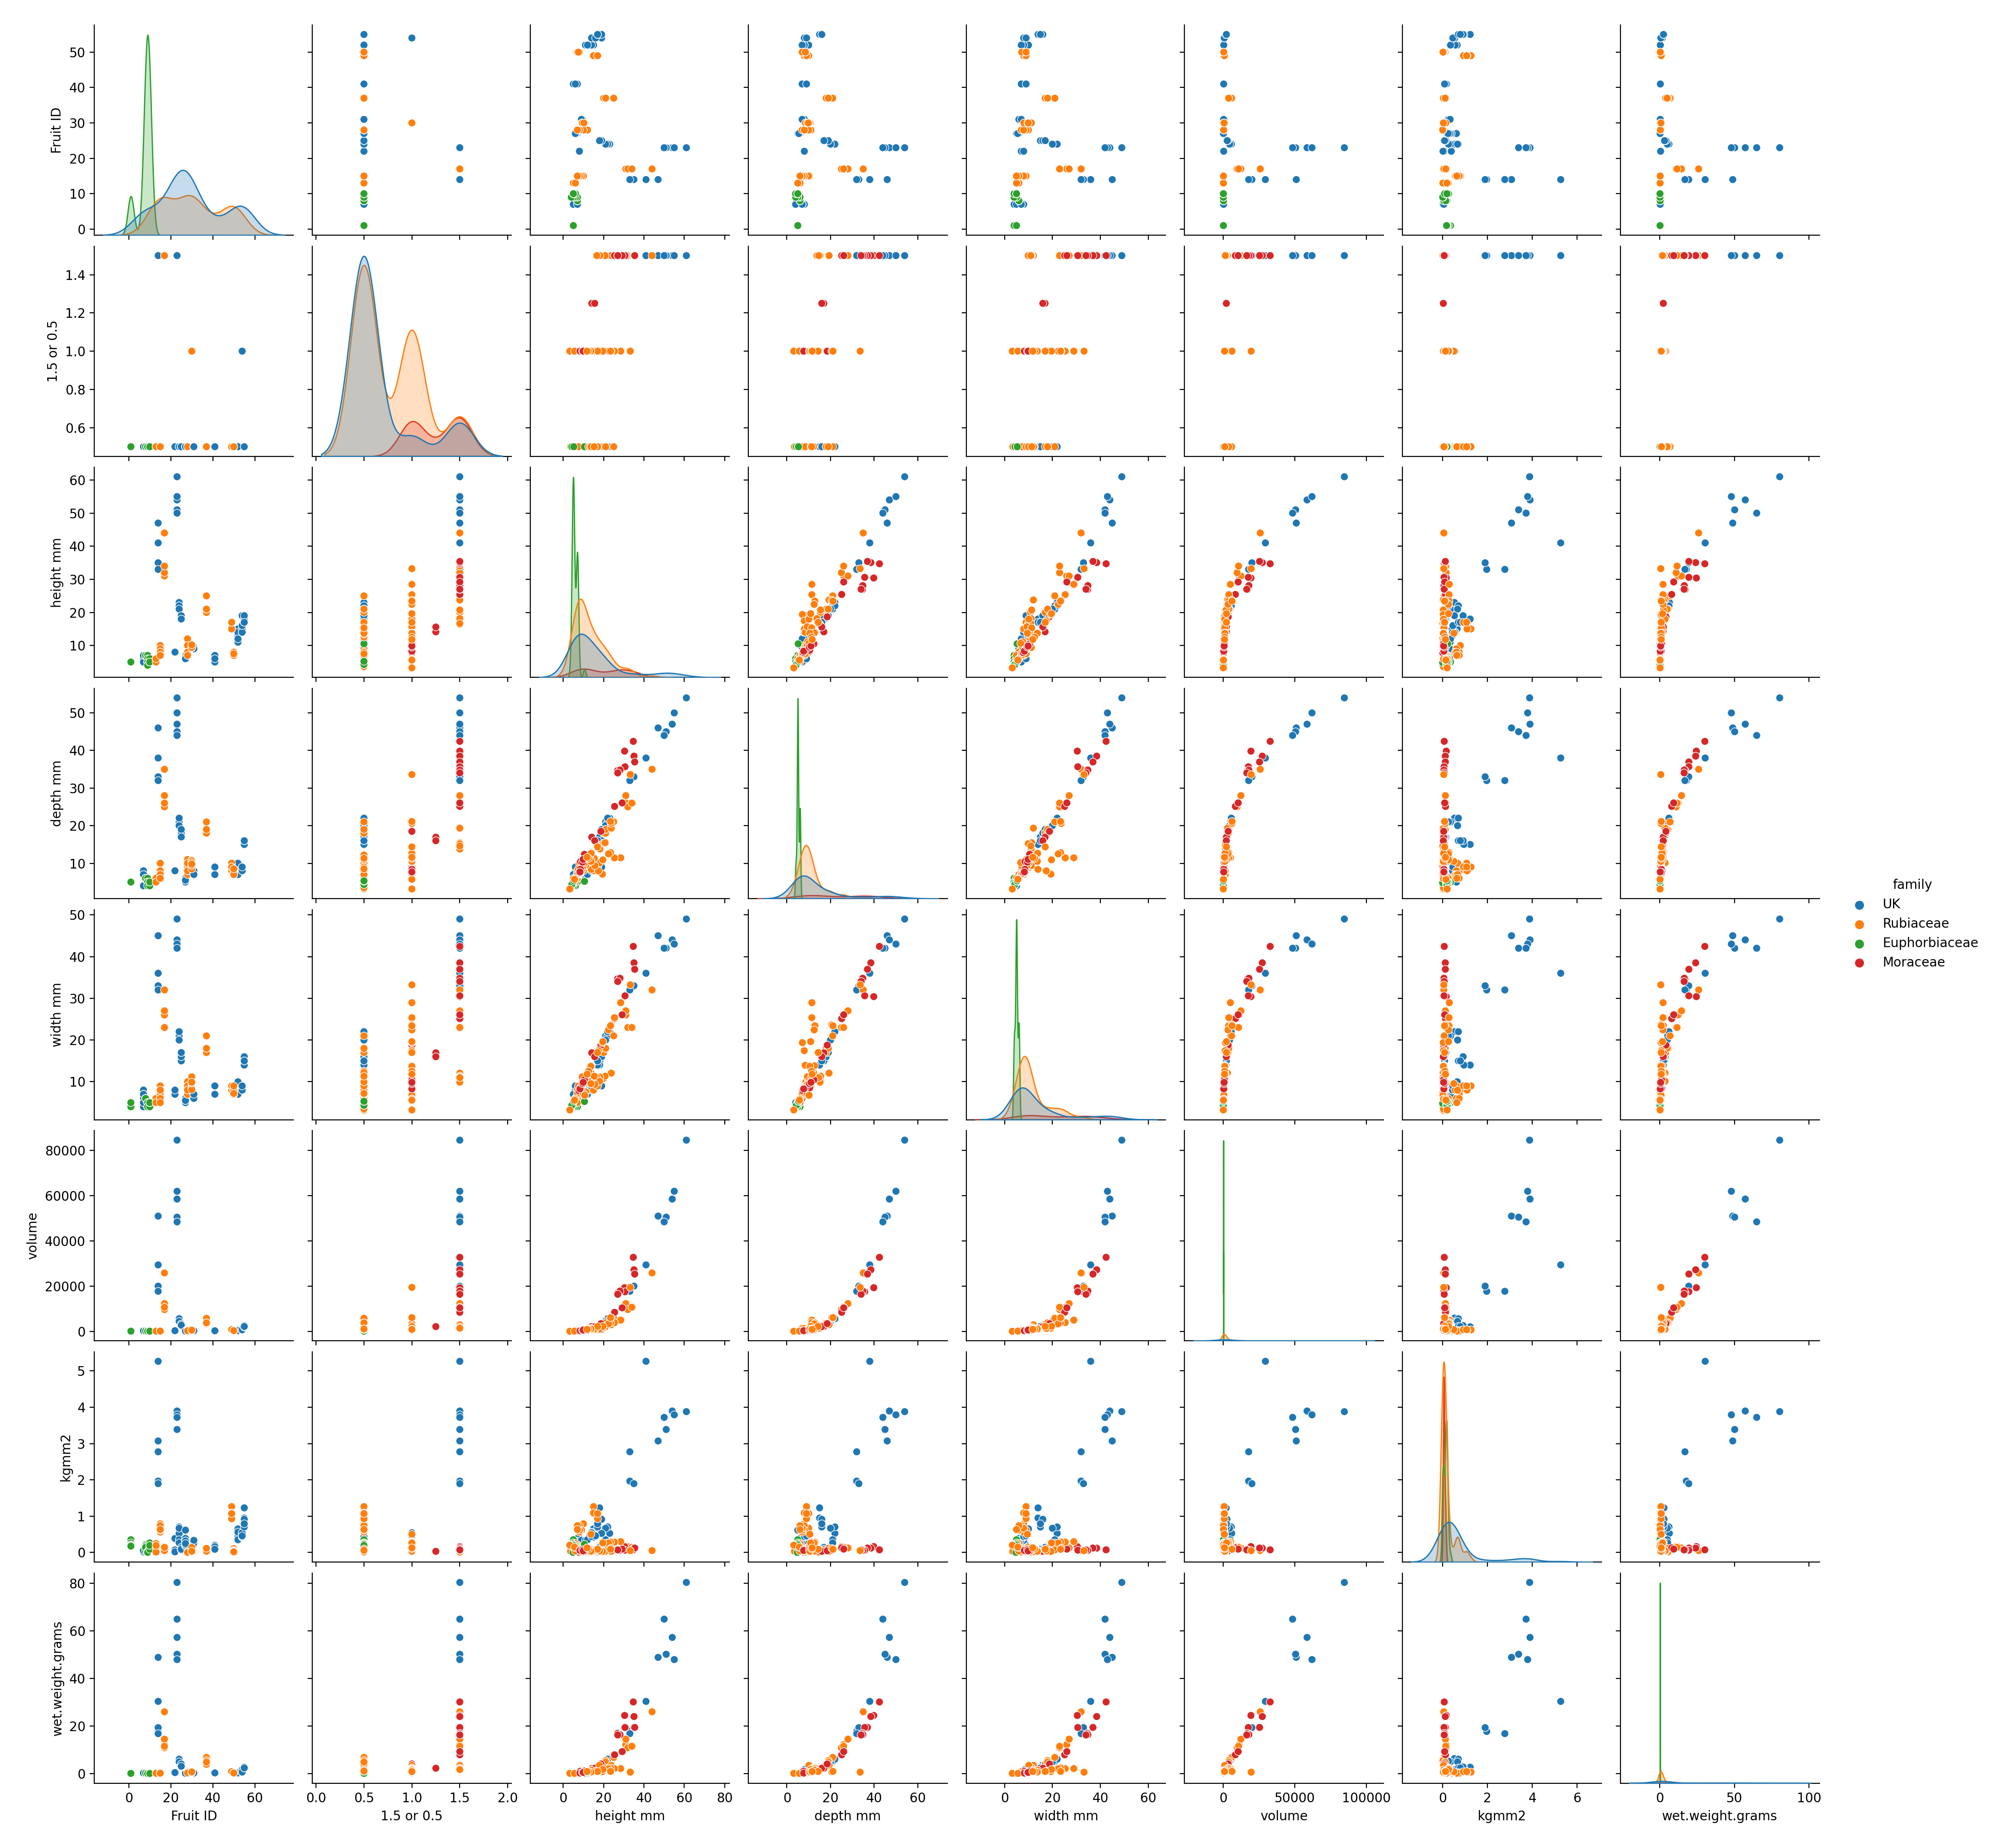

In [149]:
sns.pairplot(dfc, hue='family');

In [150]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
#deixa o grafico 3d
%matplotlib notebook 

In [169]:
dfc['family'].unique()

array(['UK', 'Rubiaceae', 'Euphorbiaceae', 'Moraceae'], dtype=object)

<IPython.core.display.Javascript object>


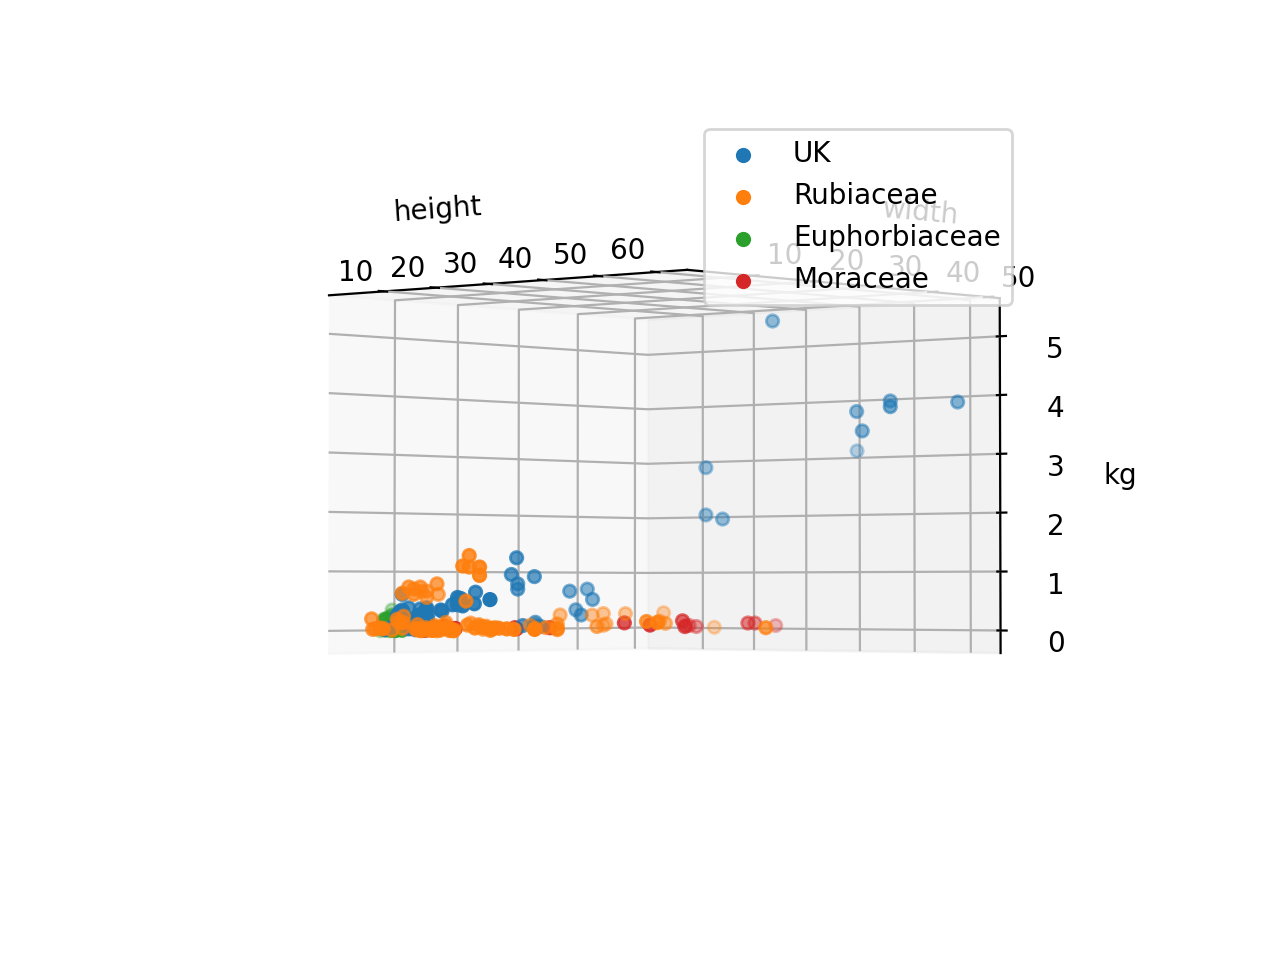

In [156]:
df = dfc

fig = plt.figure()#figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

x = df['height mm']
y = df['width mm']
z = df['kgmm2']

for g in df['family'].unique():
    ax.scatter(x[df['family']==g],y[df['family']==g],z[df['family']==g],label=g)

ax.set_xlabel("height")
ax.set_ylabel("width")
ax.set_zlabel("kg")
   
ax.legend(); # loc="upper left", bbox_to_anchor=(-0.7,1.2)

In [ ]:
#dfc.head()

In [ ]:
#dfc = pd.merge(dfc, dff, on='Movie_ID')

In [ ]:
#sns.pairplot(dfc, hue='Rating')

In [ ]:
#sns.pairplot(dfc, hue='Certificate')

In [167]:
#dff = dfc[['height mm', 'width mm', 'depth mm']]

In [172]:
dfc = dfc[['height mm', 'width mm', 'kgmm2']]

In [173]:
#dfc = dfc

In [174]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=3, min_samples=6).fit(dfc)
np.unique(dbs.labels_)

array([-1,  0])

<IPython.core.display.Javascript object>


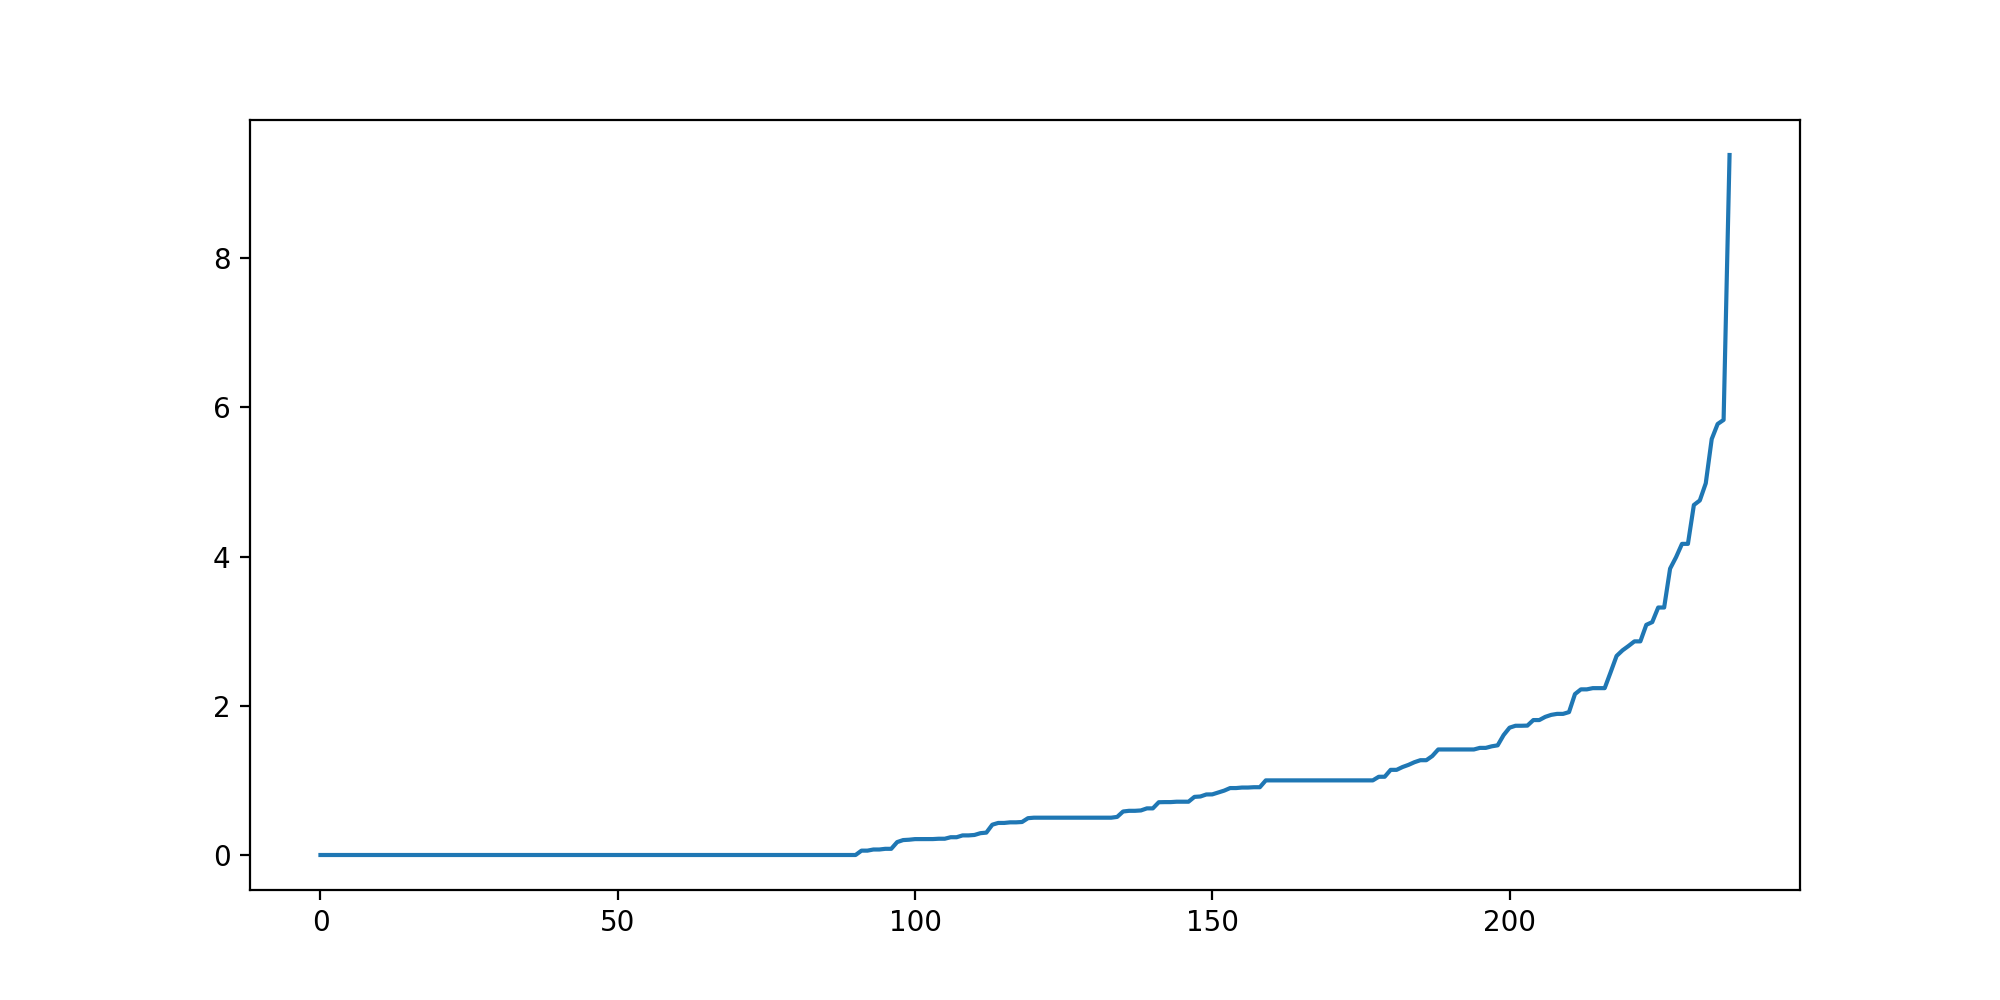

In [181]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(dff)
distances, idx = nn.kneighbors(dff)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [182]:
dbs = DBSCAN(eps=2.1, min_samples=6).fit(dfc)
np.unique(dbs.labels_)

array([-1,  0,  1,  2])

In [183]:
dfc['cluster'] = dbs.labels_

/var/folders/jg/2dgmn_k55gl3cs8syw0tw_yw0000gn/T/ipykernel_85098/313504408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['cluster'] = dbs.labels_


In [184]:
dfc

height mm  width mm     kgmm2  cluster
0      7.00000   8.00000  0.070211        0
1      6.00000   7.00000  0.052658        0
2      6.00000   8.00000  0.052658        0
3      7.00000   7.00000  0.035105        0
4      7.00000   7.00000  0.017553        0
..         ...       ...       ...      ...
498   23.65600  23.65600  0.112750        1
499   23.41000  23.41000  0.087020        1
500   13.69625  13.69625  0.032886        0
501   12.52250  12.52250  0.103083        0
502   11.81000  11.81000  0.127748        0

[238 rows x 4 columns]

<IPython.core.display.Javascript object>


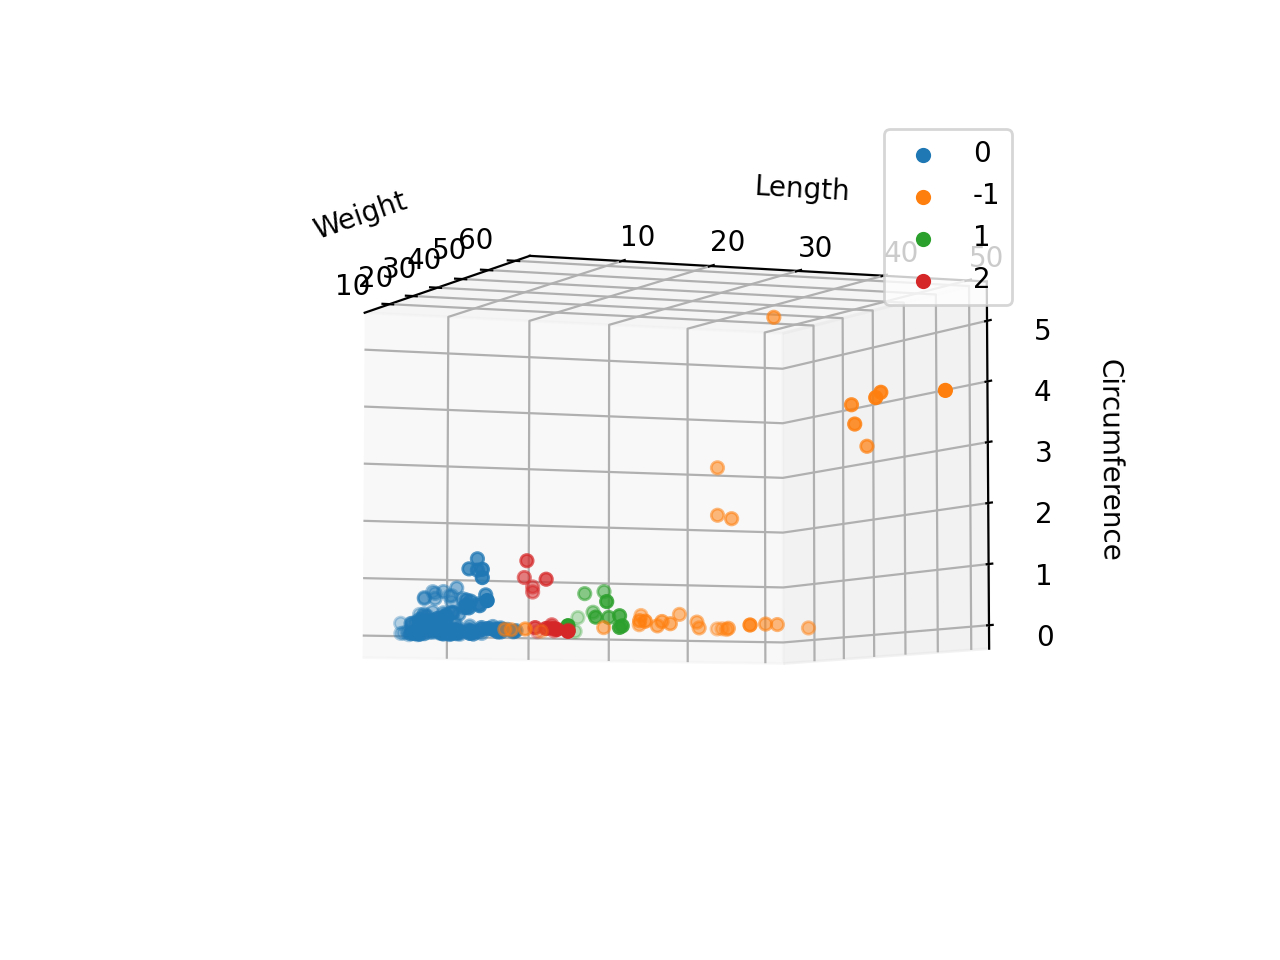

In [185]:
df = dfc

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['height mm']
y = df['width mm']
z = df['kgmm2']

for g in df.cluster.unique():
    ax.scatter(x[df.cluster==g],y[df.cluster==g],z[df.cluster==g],label=g)

ax.set_xlabel("Weight")
ax.set_ylabel("Length")
ax.set_zlabel("Circumference")
   
ax.legend();

## Harumanis Mango Physical Measurements 
- kaggle: https://www.kaggle.com/datasets/mohdnazuan/harumanis-mango-physical-measurement

This dataset contains 67 tabular physical measurement data of Harumanis Mango (clone number MA 128) collected from the Fruit Collection Center, FAMA Perlis, Malaysia.

You can refer to the paper in IEEEXplore titled "Grading of Mango Fruit Based on Physical Measurements" for more information.

In [58]:
m = pd.read_csv('../../datasets/dbscan/Data.csv')

In [59]:
m.head()

No  Weight  Length  Circumference Grade
0   1   486.5    14.0           27.0     A
1   2   388.4    12.0           26.0     A
2   3   493.7    12.0           26.5     A
3   4   342.5    10.0           24.3     A
4   5   401.5    11.0           25.0     A

<IPython.core.display.Javascript object>


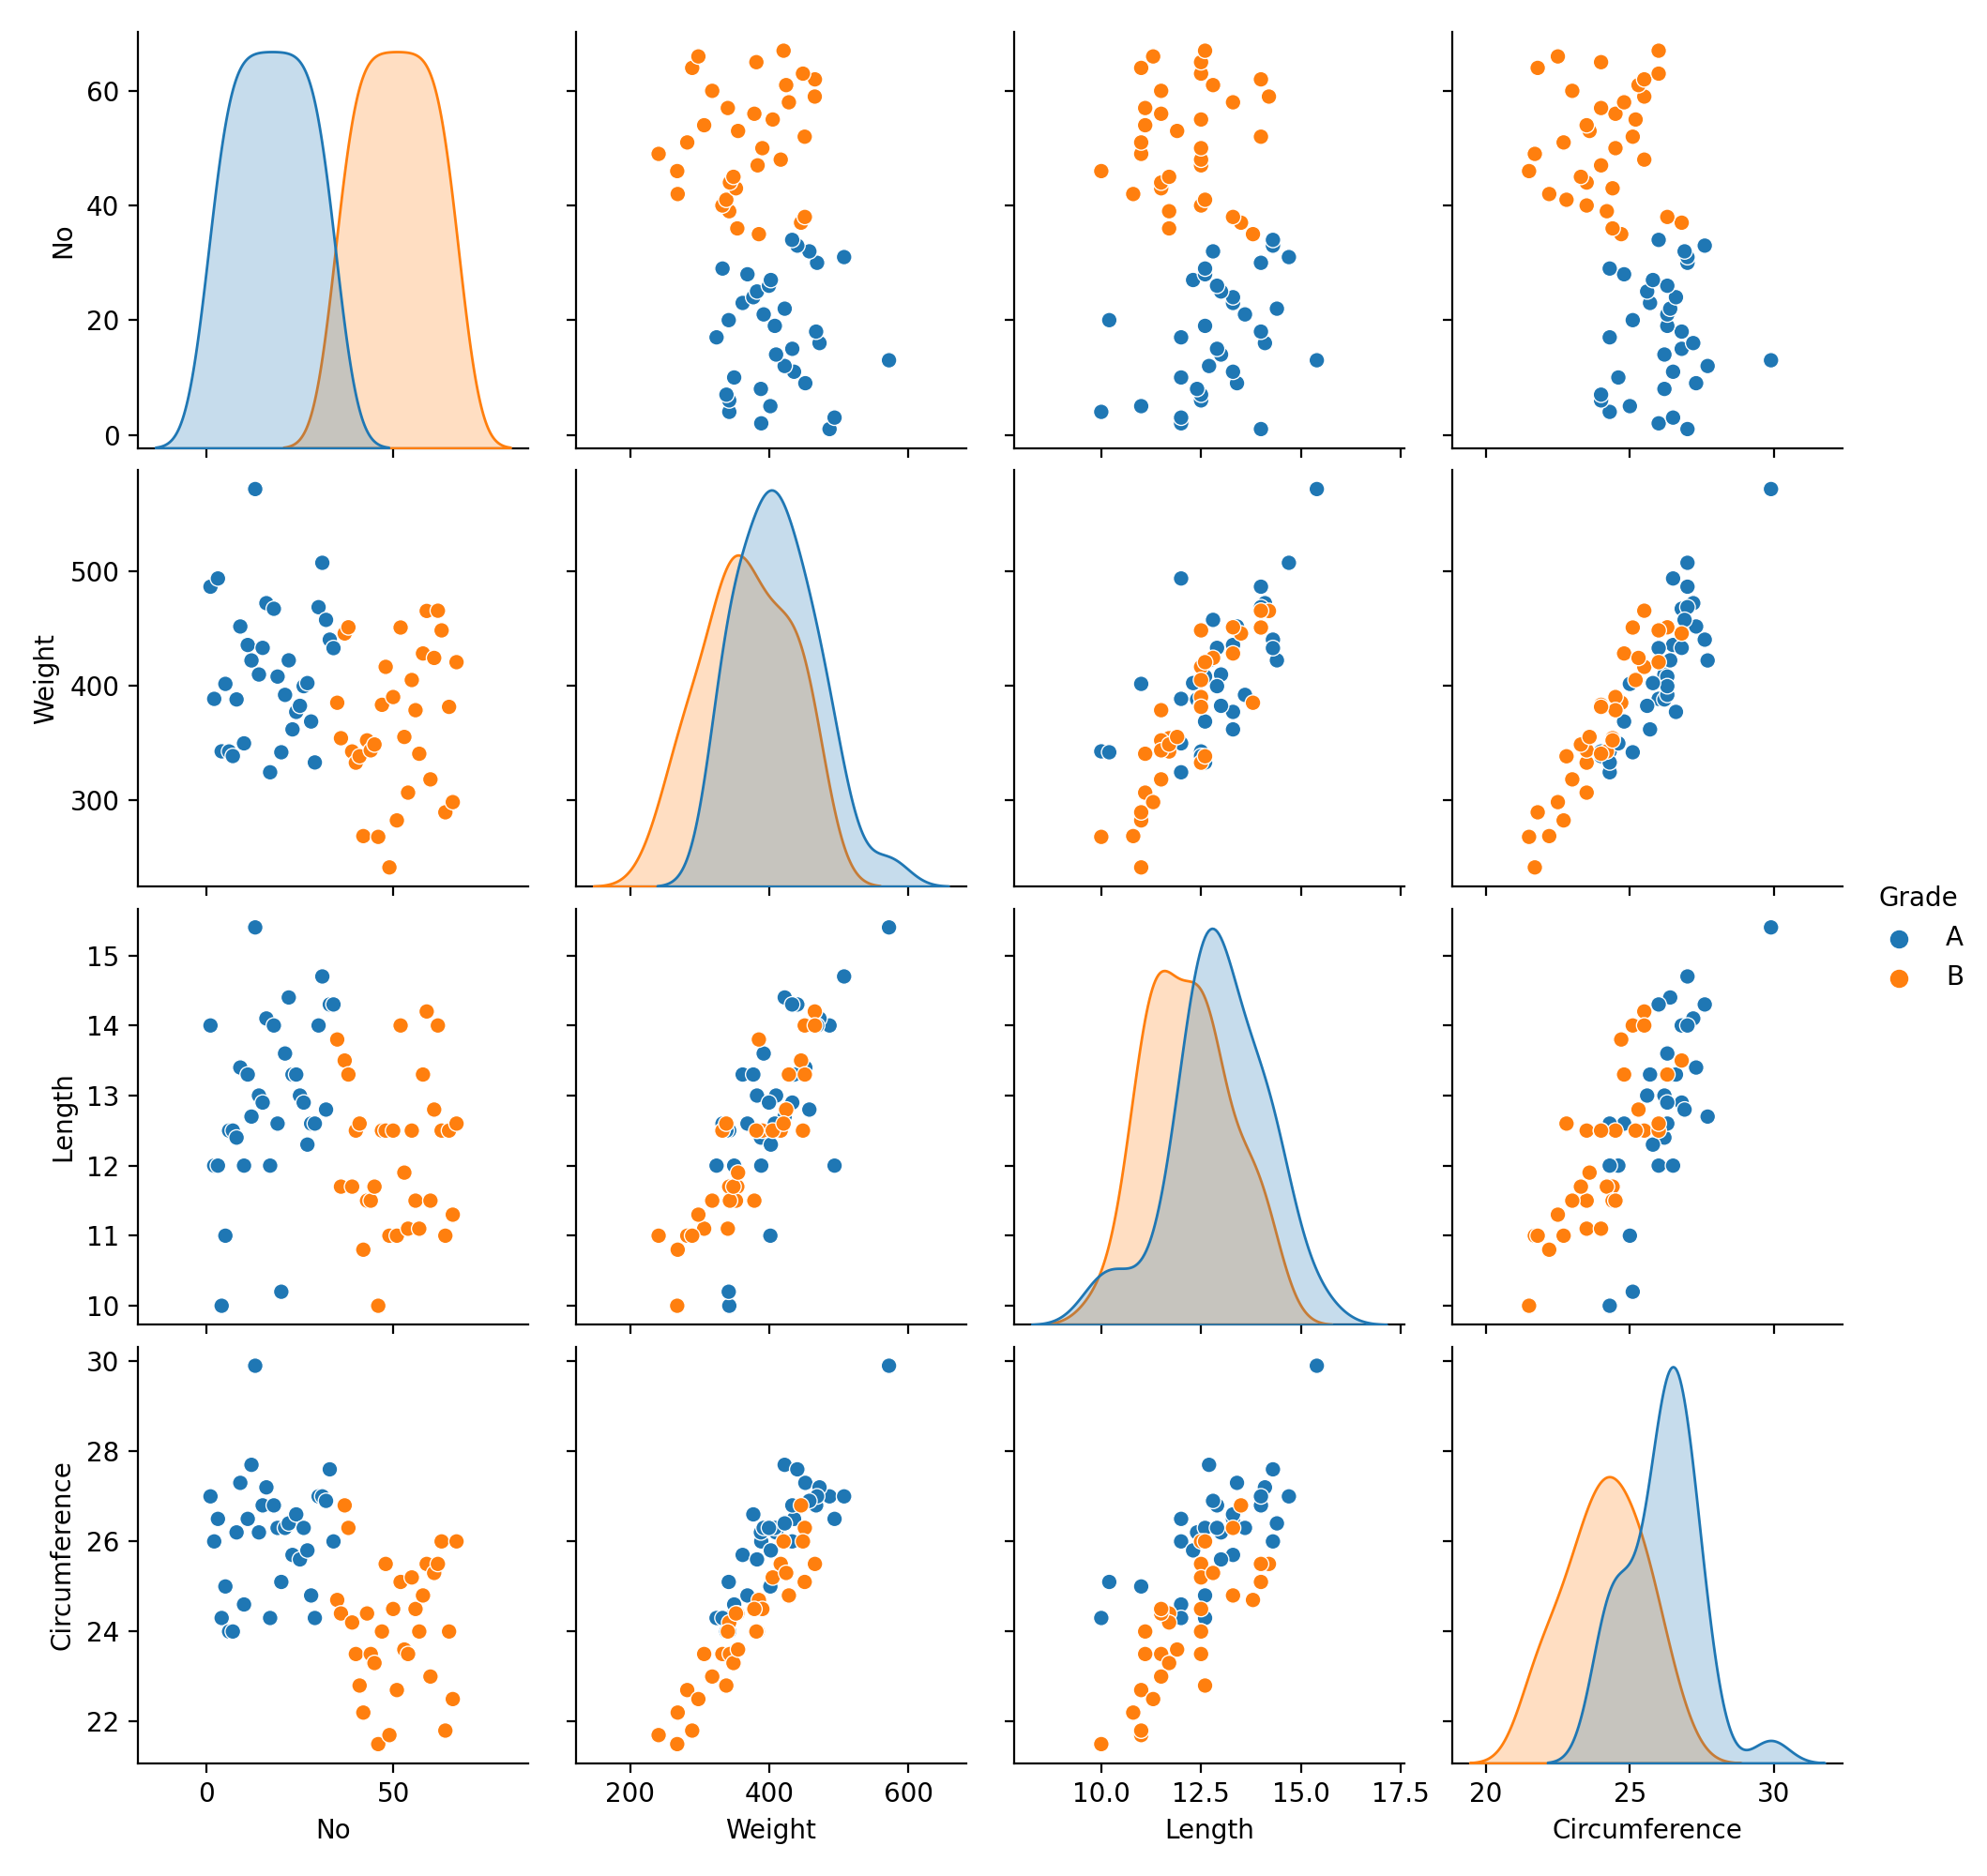

In [60]:
sns.pairplot(m, hue='Grade');

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection = '3d')
    
# # ax.legend()
# # x = m['Weight']
# # y = m['Length']
# # z = m['Circumference']

# # ax.set_xlabel("Weight")
# # ax.set_ylabel("Length")
# # ax.set_zlabel("Circumference")

# # ax.scatter(x, y, z)

# # plt.show()

<IPython.core.display.Javascript object>


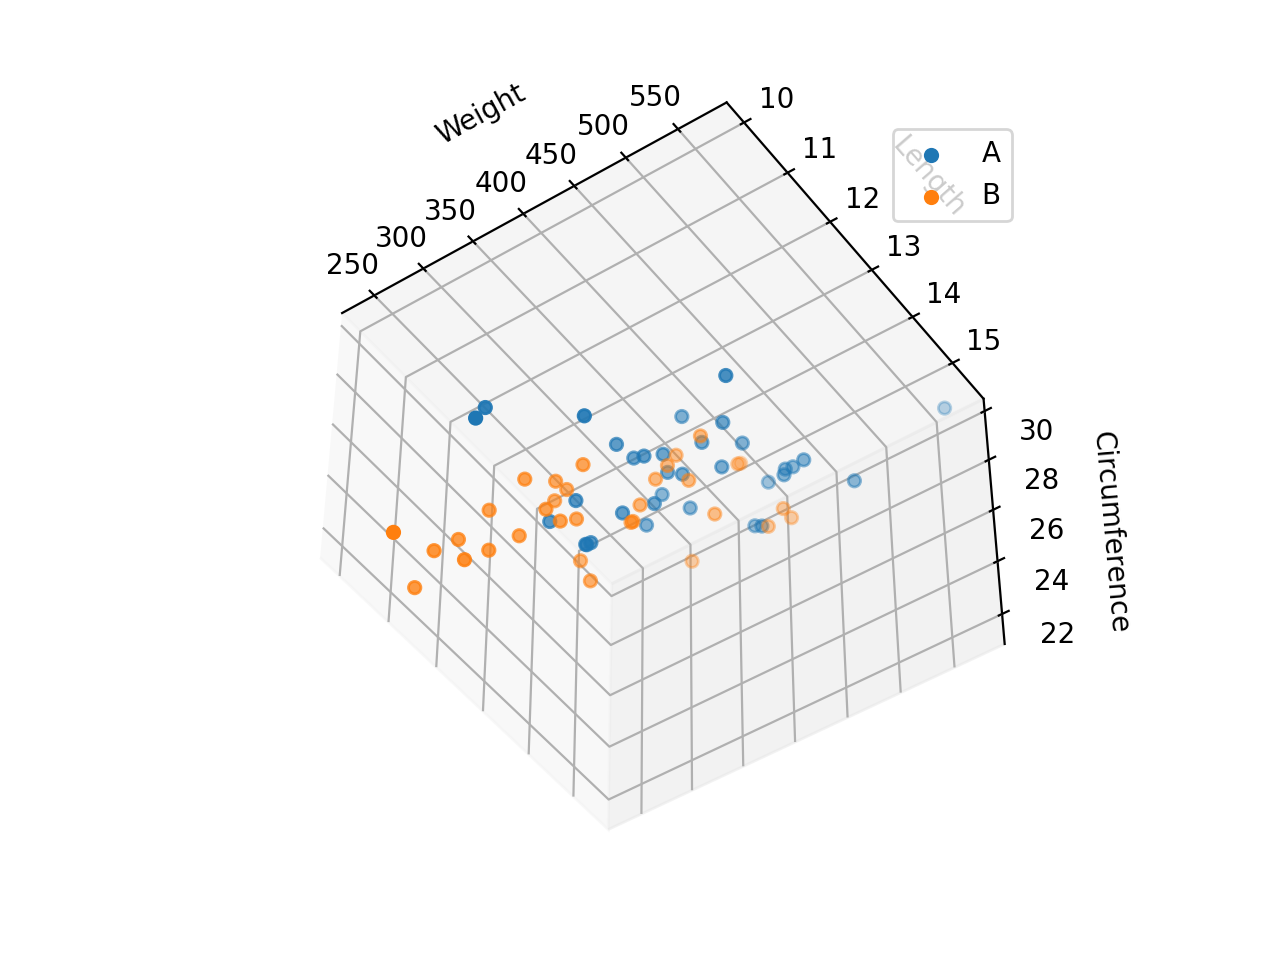

In [61]:
df = m

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['Weight']
y = df['Length']
z = df['Circumference']

for g in df.Grade.unique():
    ax.scatter(x[df.Grade==g],y[df.Grade==g],z[df.Grade==g],label=g)

ax.set_xlabel("Weight")
ax.set_ylabel("Length")
ax.set_zlabel("Circumference")
   
ax.legend();

In [62]:
dfd = m[['Weight', 'Length', 'Circumference']]

In [70]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=5, min_samples=6).fit(dfd)
np.unique(dbs.labels_)

array([-1,  0,  1])

<IPython.core.display.Javascript object>


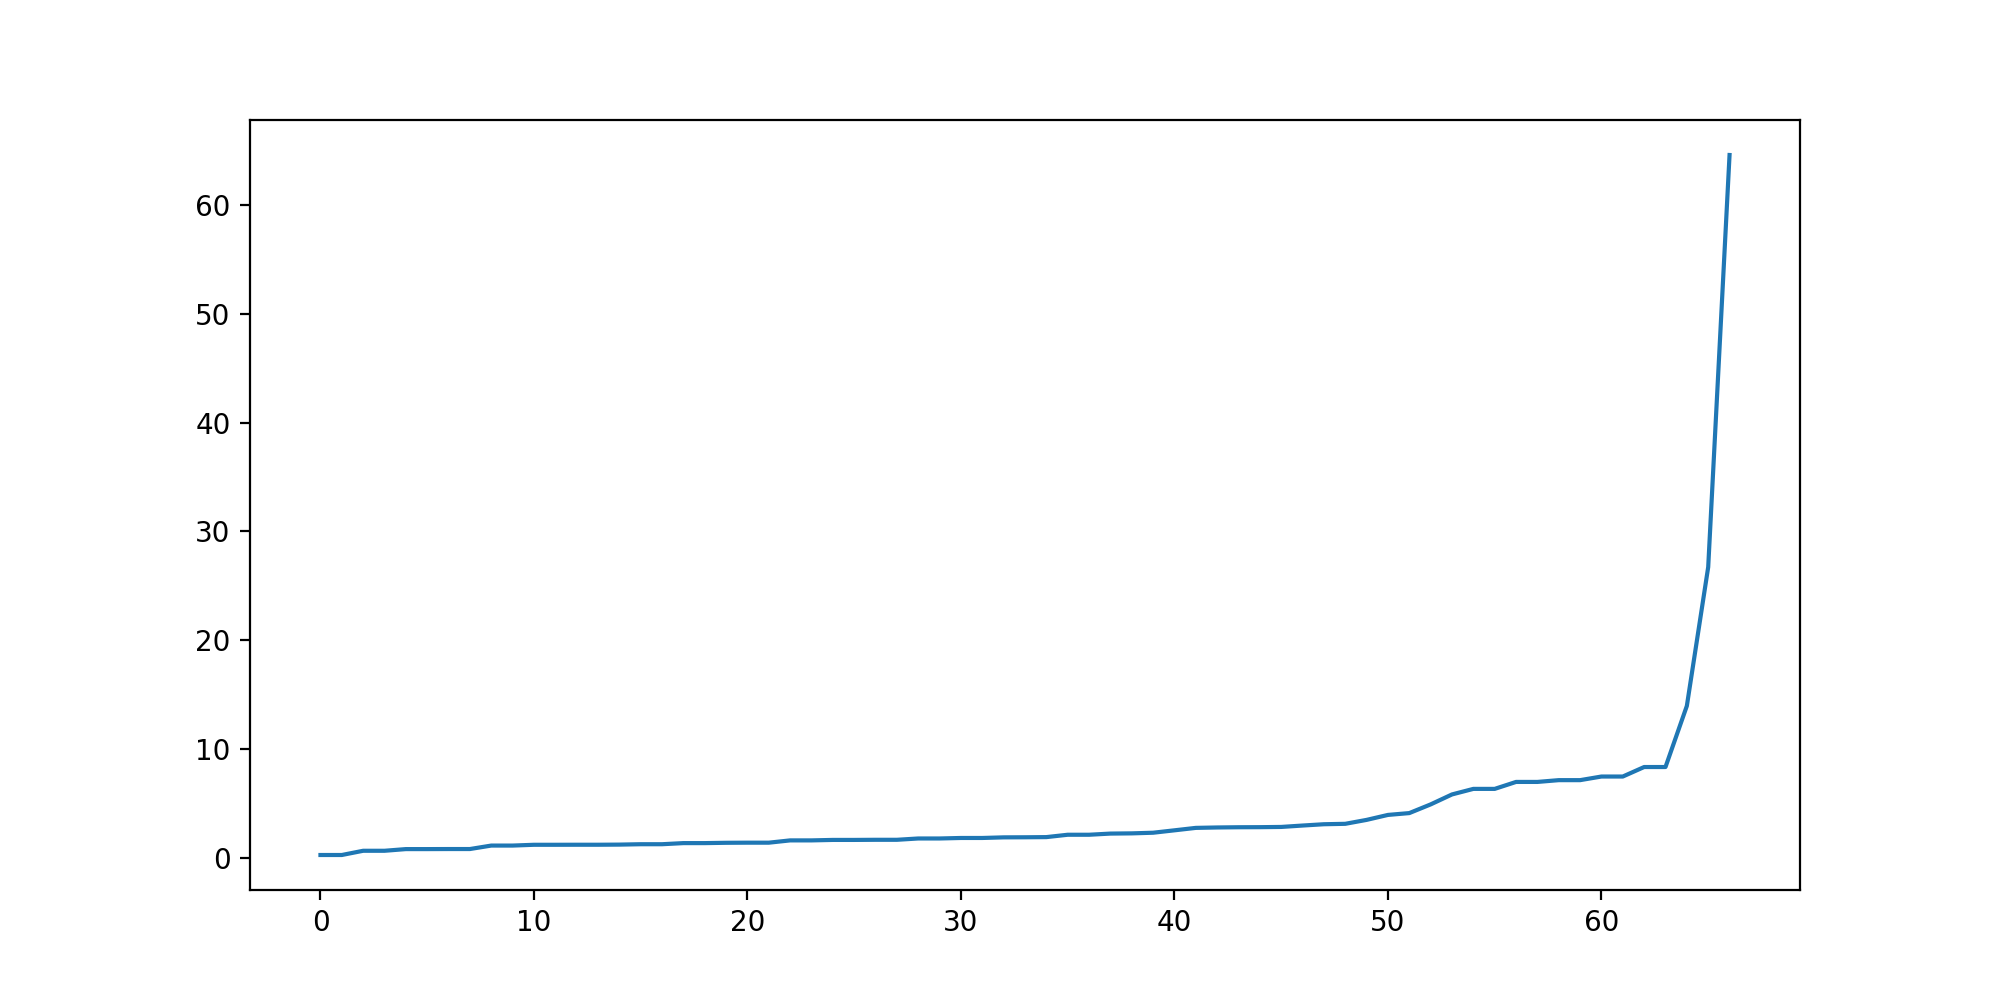

In [95]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(dfd)
distances, idx = nn.kneighbors(dfd)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [133]:
dbs = DBSCAN(eps=8.8, min_samples=6).fit(dfd)
np.unique(dbs.labels_)

array([-1,  0,  1])

In [134]:
#dbs
labels = dbs.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 12


In [135]:
dbs

DBSCAN(eps=8.8, min_samples=6)

In [136]:
# dbscan performance
# print("ARI =", adjusted_rand_score(y, clusters))

In [137]:
# plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis")

In [138]:
dfd.shape

(67, 4)

In [139]:
len(dbs.labels_)

67

In [140]:
dfd['cluster'] = dbs.labels_

/var/folders/jg/2dgmn_k55gl3cs8syw0tw_yw0000gn/T/ipykernel_85098/433990190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['cluster'] = dbs.labels_


In [141]:
dfd

Weight  Length  Circumference  cluster
0    486.5    14.0           27.0       -1
1    388.4    12.0           26.0        0
2    493.7    12.0           26.5       -1
3    342.5    10.0           24.3        1
4    401.5    11.0           25.0        0
..     ...     ...            ...      ...
62   448.3    12.5           26.0        0
63   289.2    11.0           21.8       -1
64   381.4    12.5           24.0        0
65   298.1    11.3           22.5       -1
66   420.5    12.6           26.0        0

[67 rows x 4 columns]

<IPython.core.display.Javascript object>


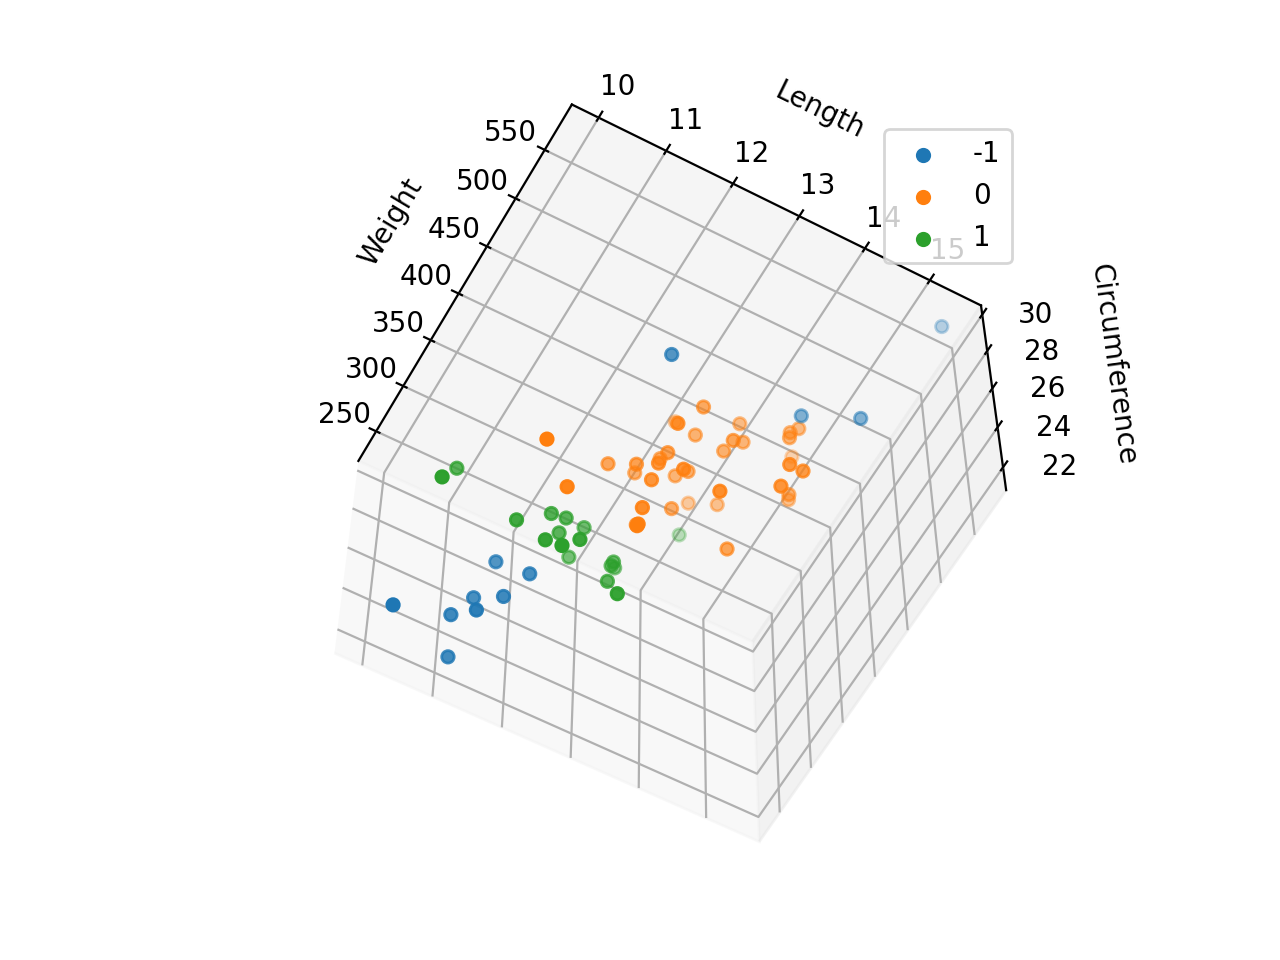

In [142]:
df = dfd

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['Weight']
y = df['Length']
z = df['Circumference']

for g in df.cluster.unique():
    ax.scatter(x[df.cluster==g],y[df.cluster==g],z[df.cluster==g],label=g)

ax.set_xlabel("Weight")
ax.set_ylabel("Length")
ax.set_zlabel("Circumference")
   
ax.legend();